#### _IMPORTING LIBRARIES_

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import cufflinks as cf
import folium
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import datetime
from folium.plugins import MarkerCluster, HeatMap, AntPath

cf.go_offline()
init_notebook_mode()

#### _READING DATA_

In [2]:
data = pd.read_excel(r"./mmap.xlsx")
land_code = pd.read_excel(r"./londonimddecile.xlsx")
land_pop = pd.read_excel(r"./boroughpop.xlsx")

In [3]:
# Making copies of the dataframes, so we will have our data intact even if something goes wrong.
df1 = data.copy()
df2 = land_code.copy()
df3 = land_pop.copy()

In [4]:
df1.shape, df2.shape, df3.shape

((1328, 20), (4835, 6), (33, 2))

#### _EDA_

In [5]:
df1.head()

ID       date  vicage vicsex                    vicethnic  susno  \
0  MM00001 2008-01-03      18      M       Black or Black British    NaN   
1  MM00002 2008-01-06      44      F       White or White British    NaN   
2  MM00003 2008-01-07      18      M  Any Other Ethnic Appearance    NaN   
3  MM00004 2008-01-08      58      M       White or White British    NaN   
4  MM00005 2008-01-13      25      M  Any Other Ethnic Appearance    NaN   

   susage sussex        weapon  Status  latitude  longitude  easting  \
0     NaN    NaN         Knife  Solved  51.61624   -0.06395   534139   
1     NaN    NaN         Knife  Solved  51.45999   -0.13245   529840   
2     NaN    NaN         Knife  Solved  51.47409    0.17896   551426   
3     NaN    NaN  Blunt Object  Solved  51.58685   -0.27605   519533   
4     NaN    NaN         Knife  Solved  51.46222   -0.11401   531115   

   northing        vicagegp susagegp  catdom  catsyvage   lsoacode    ladnm  
0    192598   D. Teen 17-19      NaN       0          1  E01001432  Enfield  
1    175100  G. Adult 35-44      NaN       1          0  E01003057  Lambeth  
2    177266   D. Teen 17-19      NaN       0          1  E01000373   Bexley  
3    188963  I. Adult 55-64      NaN       0          0  E01000591    Brent  
4    175381  F. Adult 25-34      NaN       0          0  E01003047  Lambeth

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         1328 non-null   object        
 1   date       1328 non-null   datetime64[ns]
 2   vicage     1328 non-null   int64         
 3   vicsex     1328 non-null   object        
 4   vicethnic  1281 non-null   object        
 5   susno      719 non-null    float64       
 6   susage     712 non-null    float64       
 7   sussex     715 non-null    object        
 8   weapon     1328 non-null   object        
 9   Status     1328 non-null   object        
 10  latitude   1328 non-null   float64       
 11  longitude  1328 non-null   float64       
 12  easting    1328 non-null   int64         
 13  northing   1328 non-null   int64         
 14  vicagegp   1328 non-null   object        
 15  susagegp   712 non-null    object        
 16  catdom     1328 non-null   int64         


Based on the above information about dataset, we are going to:

1. **Drop all features relating to the suspect** since these features have close to 50% of their values missing.

2. **Drop the easting and the northing features** since the longitude and latitude features are what we will be using.

3. **Drop the ID column** so we use the index provided by pandas.

4. **Fill missing values** for the remaining columns if there are any null values.


In [7]:
# Dropping features about the suspect.
df1.drop(columns=['susno', 'susage', 'sussex', 'susagegp'], axis=1, inplace=True)

In [8]:
# Dropping ID, easting and northing features.
df1.drop(columns=['easting', 'northing', 'ID'], axis='columns', inplace=True)

In [9]:
df1

date  vicage vicsex                    vicethnic        weapon  \
0    2008-01-03      18      M       Black or Black British         Knife   
1    2008-01-06      44      F       White or White British         Knife   
2    2008-01-07      18      M  Any Other Ethnic Appearance         Knife   
3    2008-01-08      58      M       White or White British  Blunt Object   
4    2008-01-13      25      M  Any Other Ethnic Appearance         Knife   
...         ...     ...    ...                          ...           ...   
1323 2018-04-15      18      F                          NaN          None   
1324 2018-07-07      57      M       White or White British          None   
1325 2018-08-17      52      M       White or White British        Poison   
1326 2018-12-18      20      M       Black or Black British           Gun   
1327 2018-12-22      25      M       Black or Black British         Knife   

                Status   latitude  longitude        vicagegp  catdom  \
0               Solved  51.616240  -0.063950   D. Teen 17-19       0   
1               Solved  51.459990  -0.132450  G. Adult 35-44       1   
2               Solved  51.474090   0.178960   D. Teen 17-19       0   
3               Solved  51.586850  -0.276050  I. Adult 55-64       0   
4               Solved  51.462220  -0.114010  F. Adult 25-34       0   
...                ...        ...        ...             ...     ...   
1323  Awaiting Outcome  51.499608   0.118693   D. Teen 17-19       1   
1324  Awaiting Outcome  51.556879   0.006391  I. Adult 55-64       0   
1325  Awaiting Outcome  51.361473  -0.306080  H. Adult 45-54       0   
1326  Awaiting Outcome  51.632943  -0.050988  E. Adult 20-24       0   
1327  Awaiting Outcome  51.592631  -0.069436  F. Adult 25-34       0   

      catsyvage   lsoacode                 ladnm  
0             1  E01001432               Enfield  
1             0  E01003057               Lambeth  
2             1  E01000373                Bexley  
3             0  E01000591                 Brent  
4             0  E01003047               Lambeth  
...         ...        ...                   ...  
1323          0  E01001575             Greenwich  
1324          0  E01004328        Waltham Forest  
1325          0  E01002947  Kingston upon Thames  
1326          1  E01001482               Enfield  
1327          1  E01002081              Haringey  

[1328 rows x 13 columns]

In [10]:
df1.isnull().sum()

date          0
vicage        0
vicsex        0
vicethnic    47
weapon        0
Status        0
latitude      0
longitude     0
vicagegp      0
catdom        0
catsyvage     0
lsoacode      0
ladnm         0
dtype: int64

##### _Exploring the date feature_

In [11]:
# Extract the year from the date and create a new column('year) which holds them.
df1['year'] = [datetime.datetime.strptime(str(date), "%Y-%m-%d %H:%M:%S").year for date in df1.date]

In [12]:
df1

date  vicage vicsex                    vicethnic        weapon  \
0    2008-01-03      18      M       Black or Black British         Knife   
1    2008-01-06      44      F       White or White British         Knife   
2    2008-01-07      18      M  Any Other Ethnic Appearance         Knife   
3    2008-01-08      58      M       White or White British  Blunt Object   
4    2008-01-13      25      M  Any Other Ethnic Appearance         Knife   
...         ...     ...    ...                          ...           ...   
1323 2018-04-15      18      F                          NaN          None   
1324 2018-07-07      57      M       White or White British          None   
1325 2018-08-17      52      M       White or White British        Poison   
1326 2018-12-18      20      M       Black or Black British           Gun   
1327 2018-12-22      25      M       Black or Black British         Knife   

                Status   latitude  longitude        vicagegp  catdom  \
0               Solved  51.616240  -0.063950   D. Teen 17-19       0   
1               Solved  51.459990  -0.132450  G. Adult 35-44       1   
2               Solved  51.474090   0.178960   D. Teen 17-19       0   
3               Solved  51.586850  -0.276050  I. Adult 55-64       0   
4               Solved  51.462220  -0.114010  F. Adult 25-34       0   
...                ...        ...        ...             ...     ...   
1323  Awaiting Outcome  51.499608   0.118693   D. Teen 17-19       1   
1324  Awaiting Outcome  51.556879   0.006391  I. Adult 55-64       0   
1325  Awaiting Outcome  51.361473  -0.306080  H. Adult 45-54       0   
1326  Awaiting Outcome  51.632943  -0.050988  E. Adult 20-24       0   
1327  Awaiting Outcome  51.592631  -0.069436  F. Adult 25-34       0   

      catsyvage   lsoacode                 ladnm  year  
0             1  E01001432               Enfield  2008  
1             0  E01003057               Lambeth  2008  
2             1  E01000373                Bexley  2008  
3             0  E01000591                 Brent  2008  
4             0  E01003047               Lambeth  2008  
...         ...        ...                   ...   ...  
1323          0  E01001575             Greenwich  2018  
1324          0  E01004328        Waltham Forest  2018  
1325          0  E01002947  Kingston upon Thames  2018  
1326          1  E01001482               Enfield  2018  
1327          1  E01002081              Haringey  2018  

[1328 rows x 14 columns]

In [13]:
df1.year.value_counts()

2008    155
2018    131
2009    130
2017    130
2010    128
2011    121
2015    120
2013    113
2016    107
2012    103
2014     90
Name: year, dtype: int64

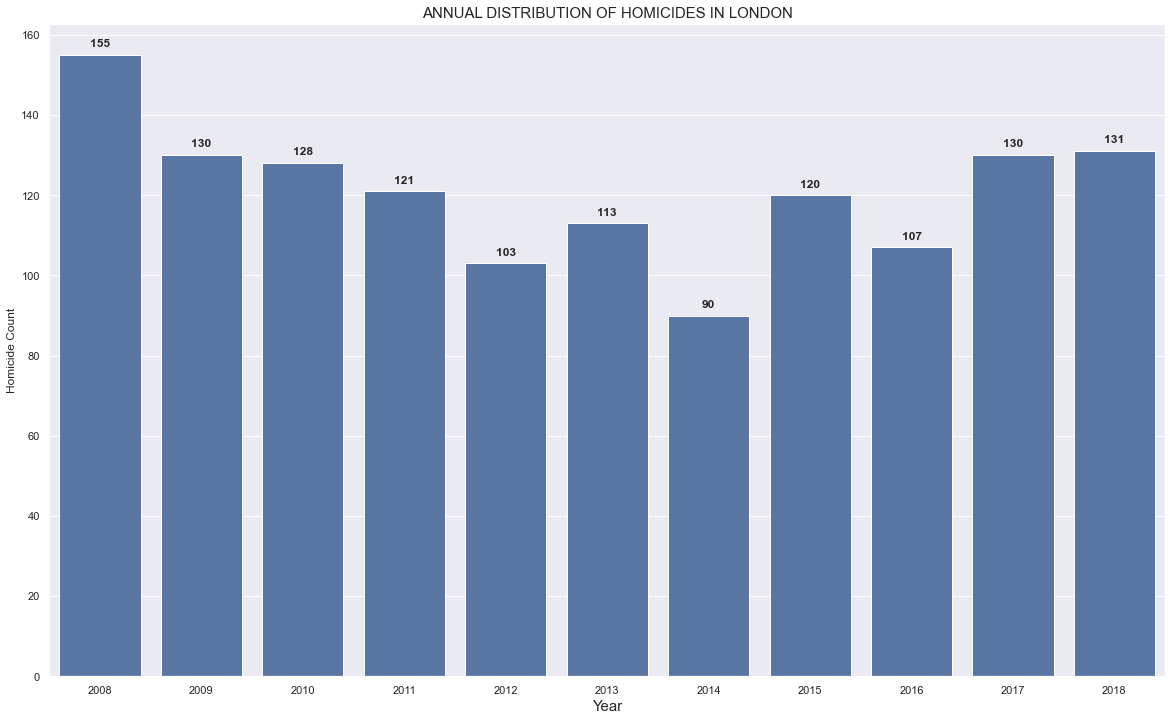

In [14]:
# Finding the annual distribution of homicides 
sns.set_style('darkgrid')
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.countplot(data=df1, x="year", color=sns.color_palette()[0], order=(np.arange(2008,2019)))
ax.set_title('annual distribution of homicides in london'.upper(), fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Homicide Count', fontsize=12)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height()+2, i.get_height(), horizontalalignment='center', fontweight='bold')

##### _Exploring the age and the Age group of victims_

In [15]:
# Exploring the age group of victims from 2008 - 2018
df1.vicagegp.value_counts()

F. Adult 25-34      271
E. Adult 20-24      234
G. Adult 35-44      210
H. Adult 45-54      155
D. Teen 17-19       140
J. Adult 65 over    112
I. Adult 55-64       92
C. Teen 13-16        55
A. Child 0-6         45
B. Child 7-12        14
Name: vicagegp, dtype: int64

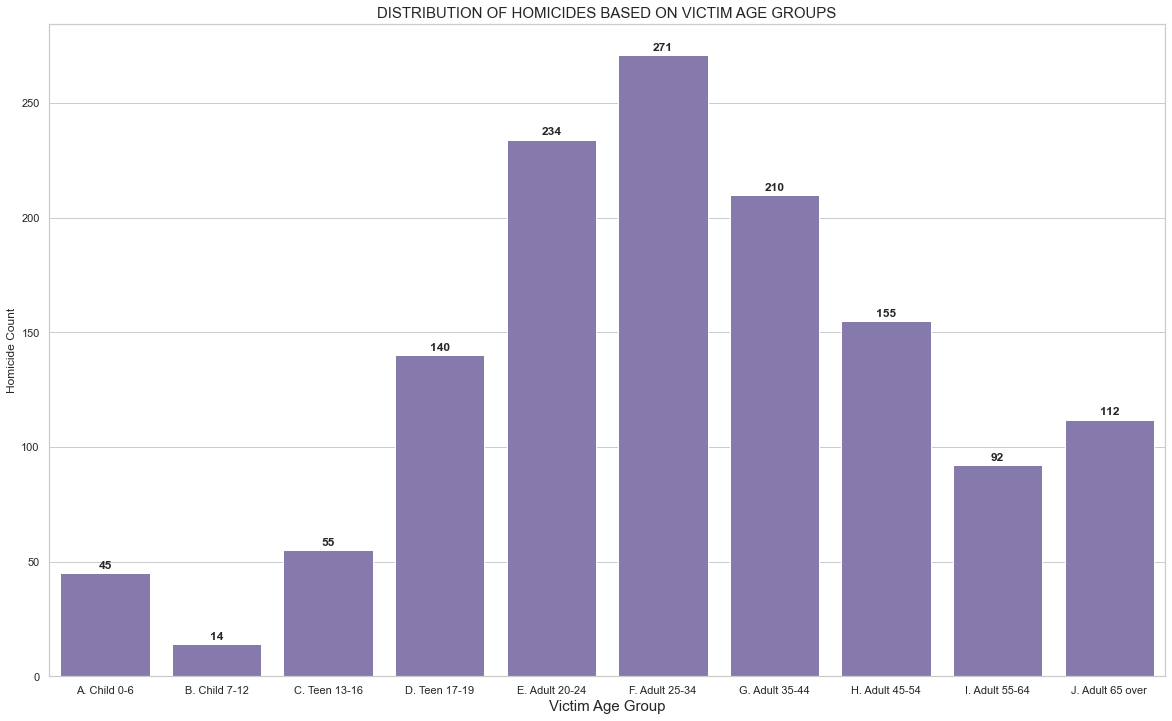

In [16]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.countplot(data=df1.sort_values(by=['vicagegp']), x="vicagegp", color=sns.color_palette()[4])
ax.set_title('distribution of homicides based on victim age groups'.upper(), fontsize=15)
ax.set_xlabel('Victim Age Group', fontsize=15)
ax.set_ylabel('Homicide Count', fontsize=12)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height()+2, i.get_height(), horizontalalignment='center', fontweight='bold')

Most victims of homicide are within the 25-34 age group, closely followed by people within the 20-24 who are also followed by people within the 35-44 group.

We can say adults within the age of 20-44 are more likely to be killed.

While children(0-12) are least likely to be killed.

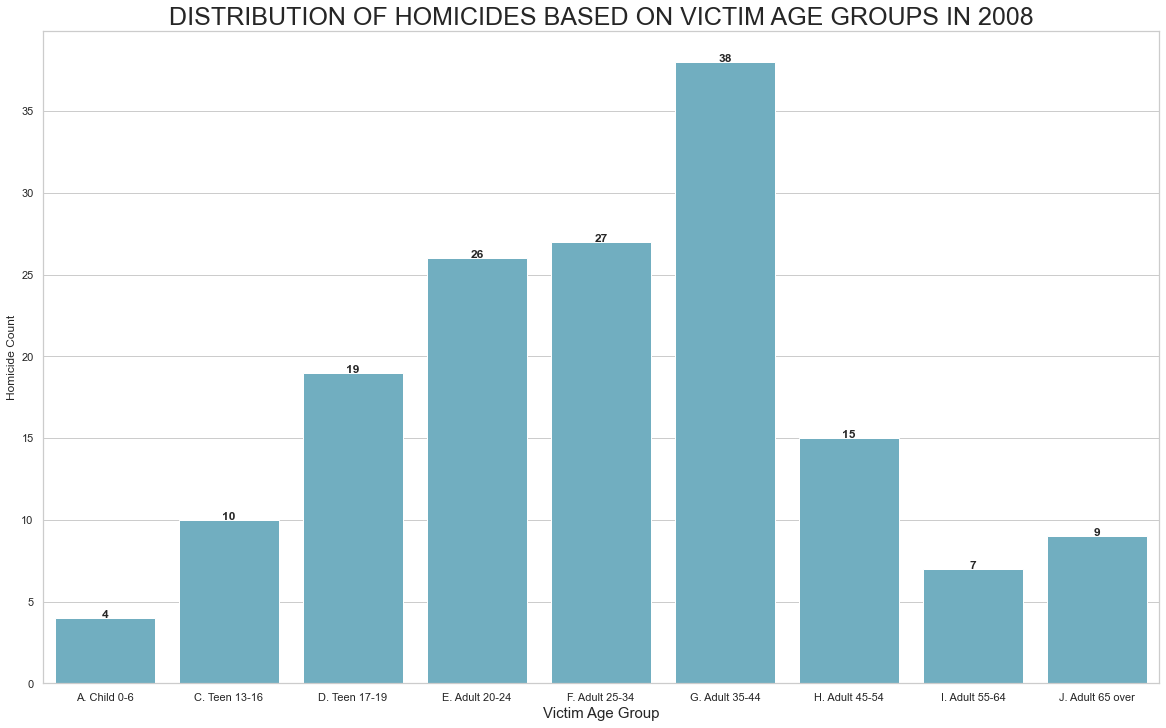

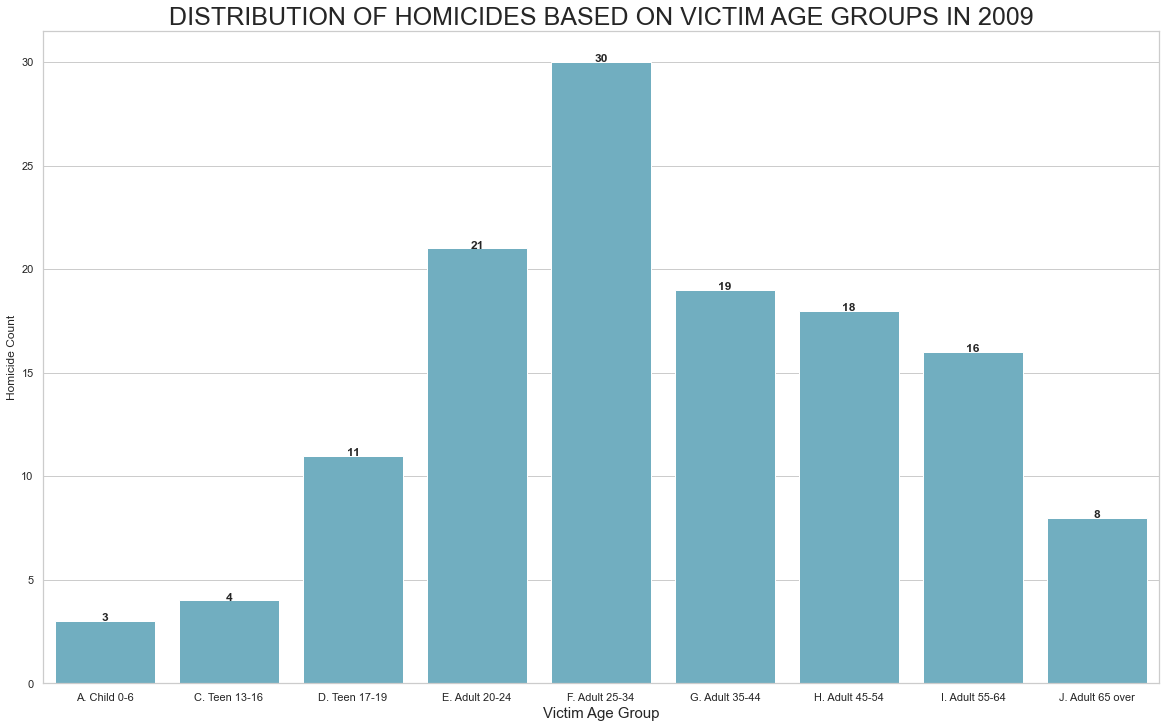

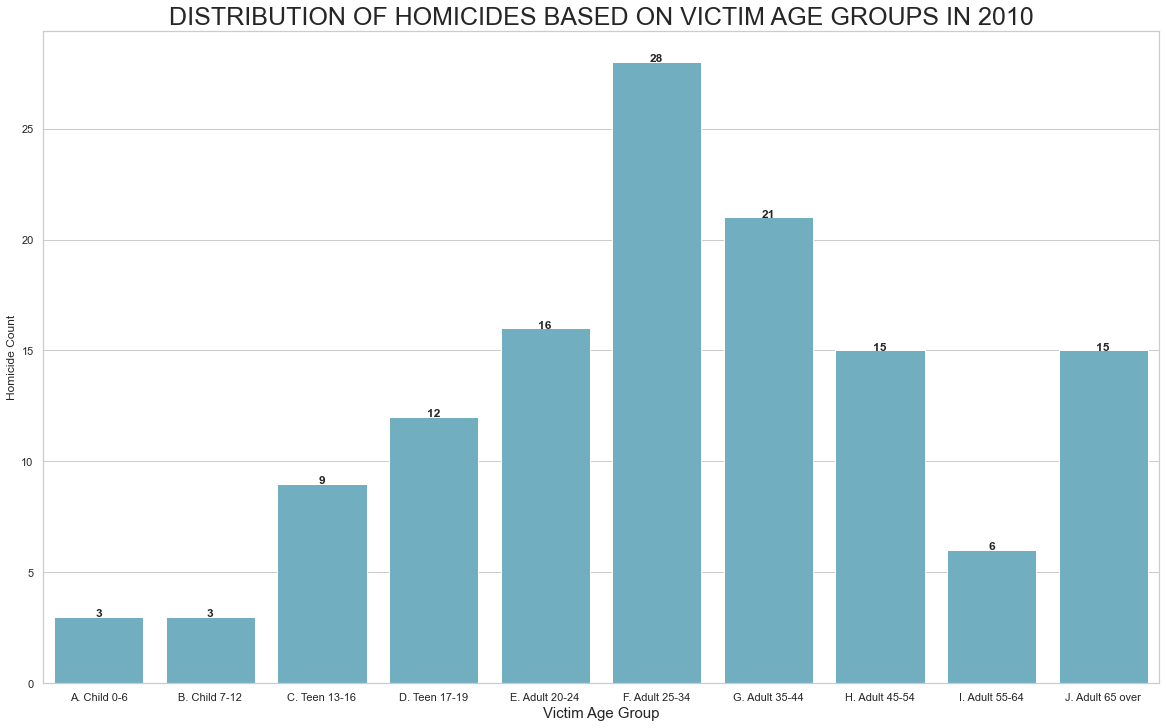

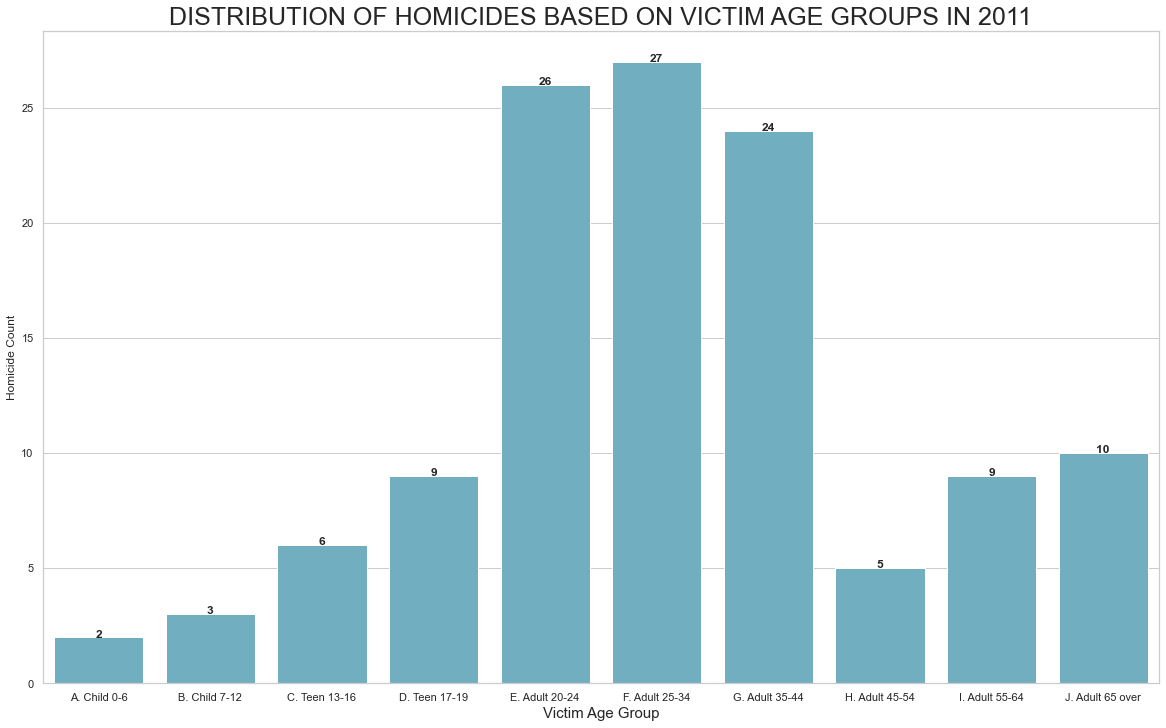

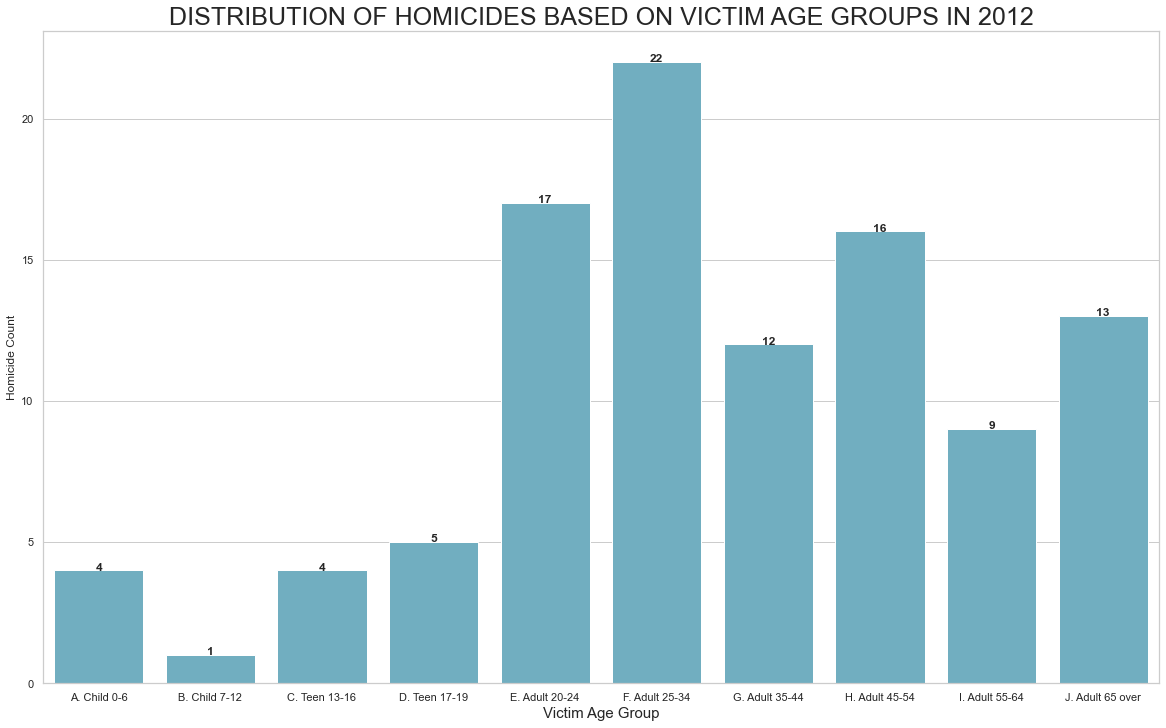

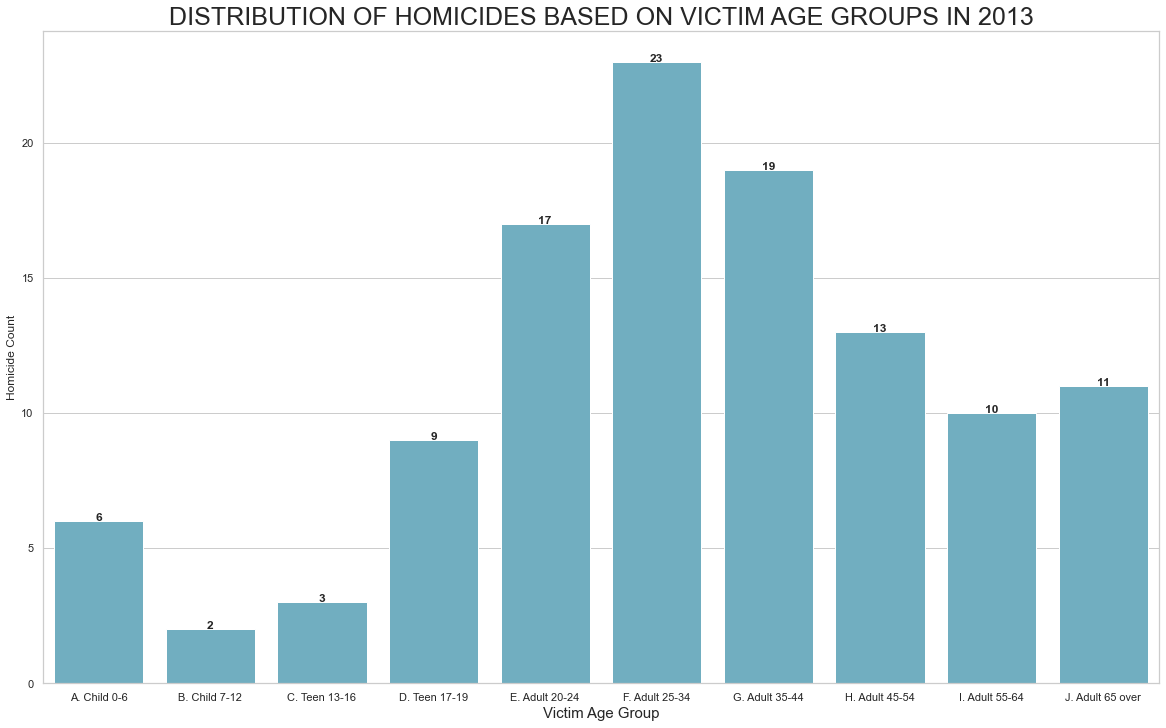

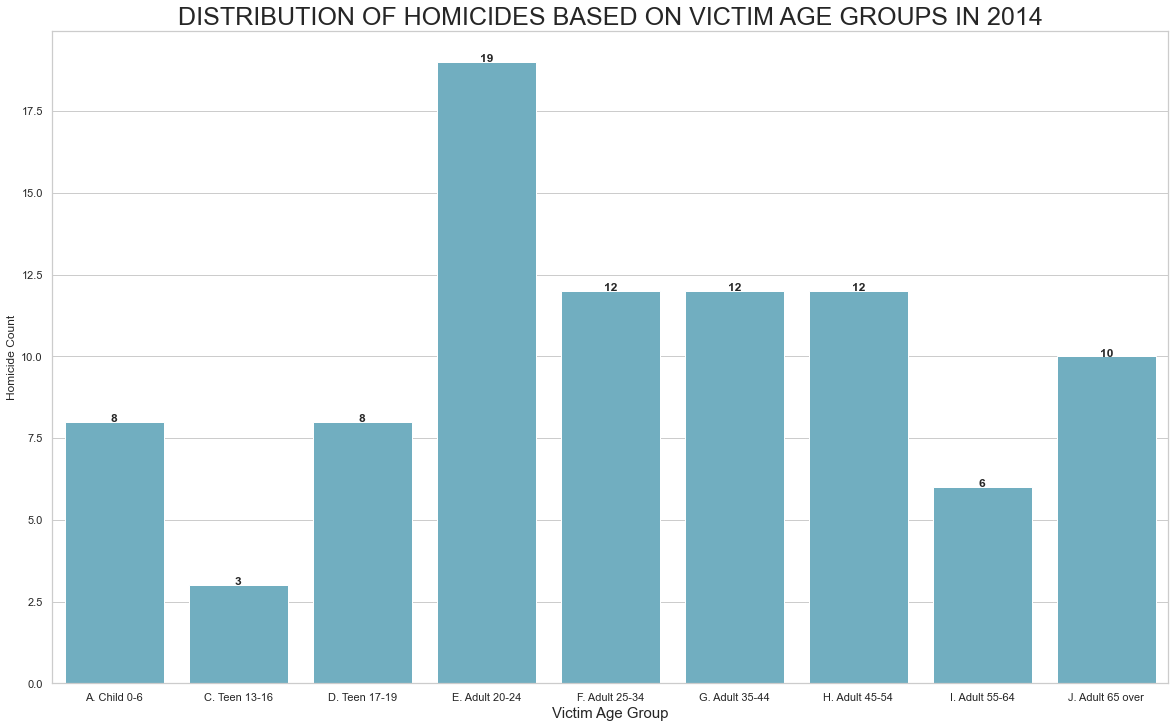

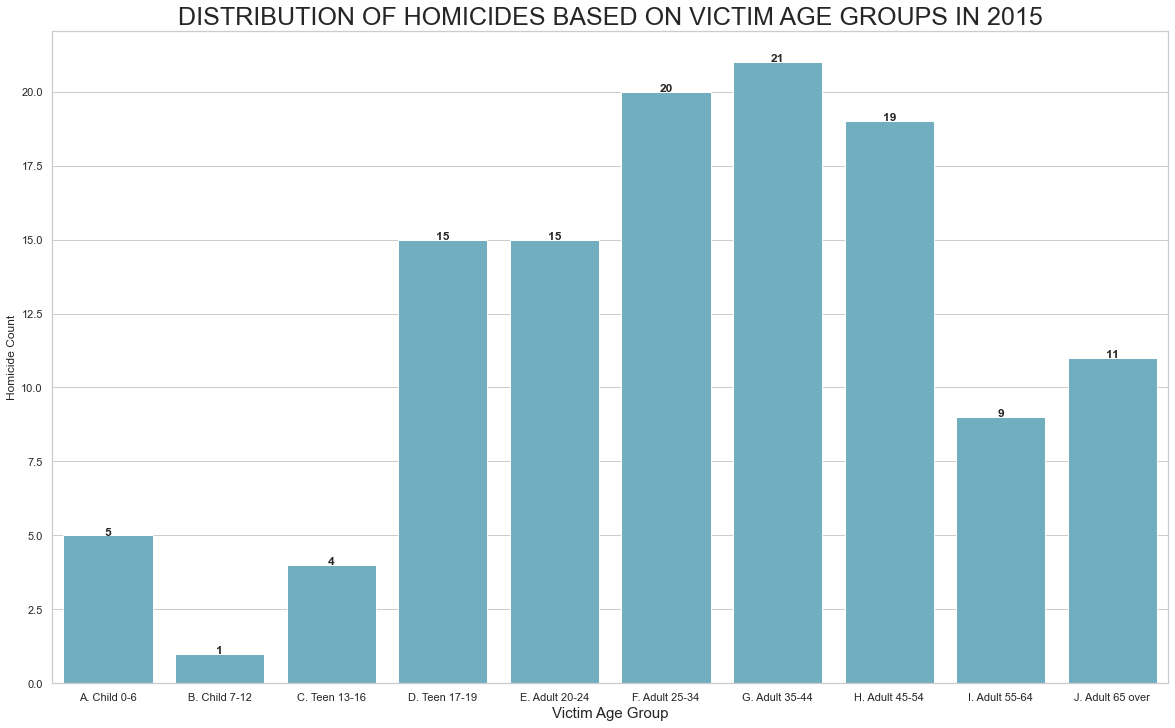

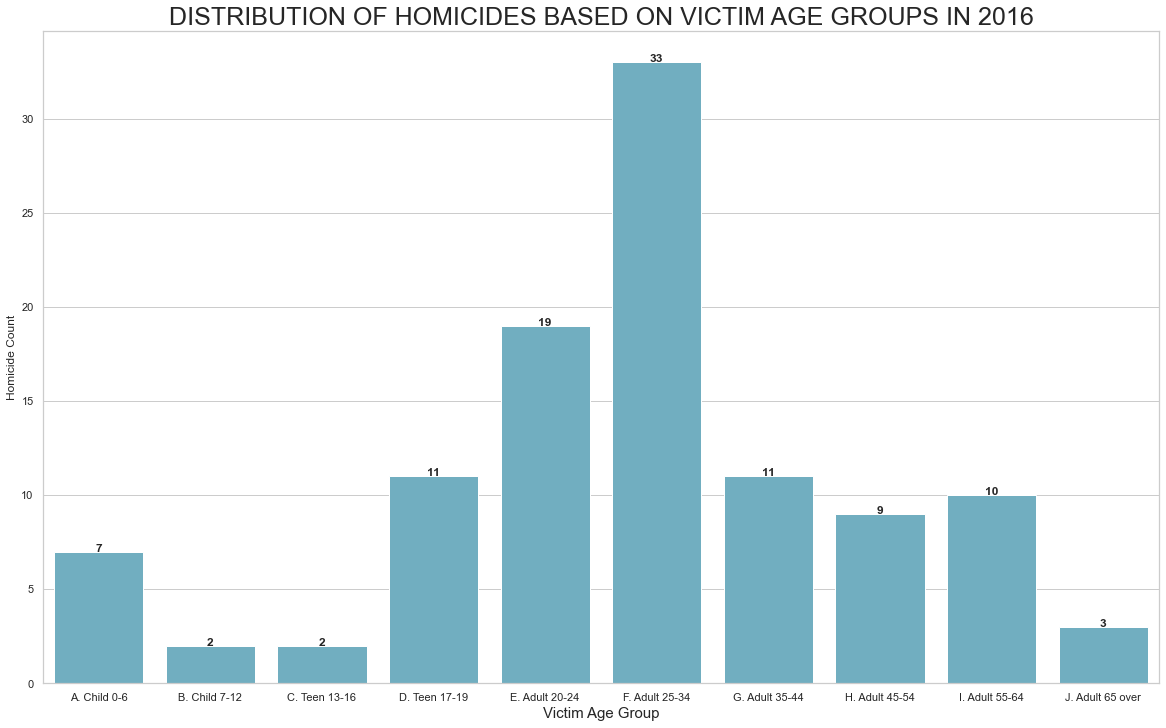

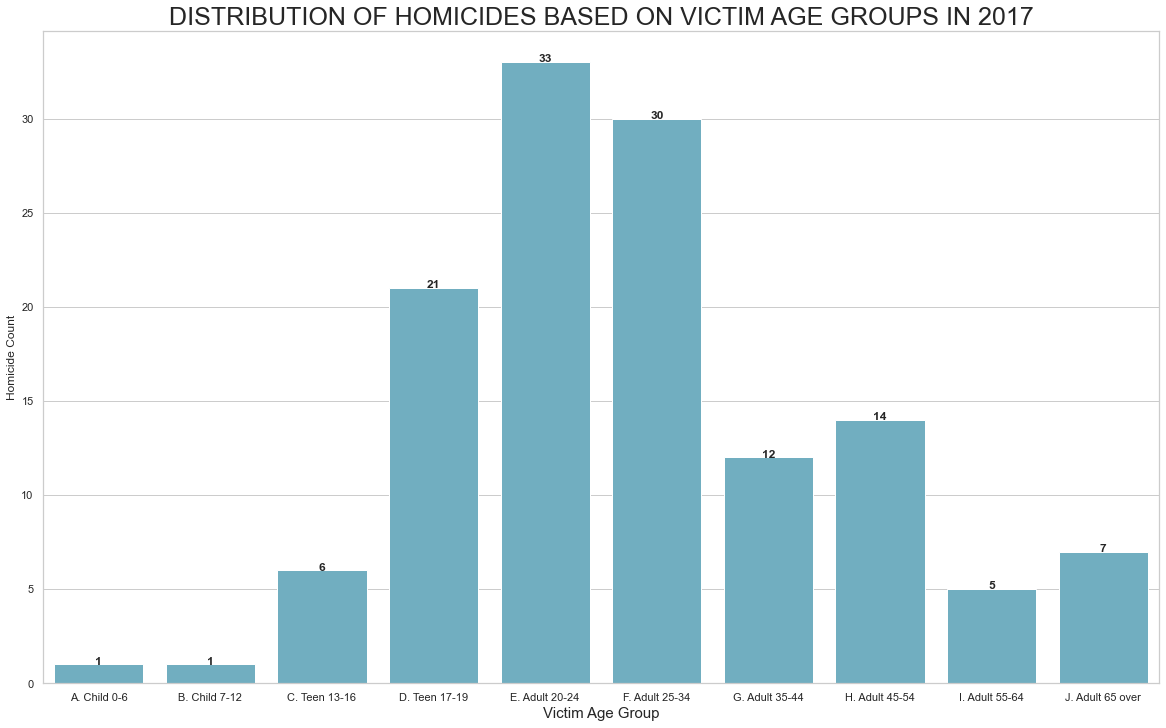

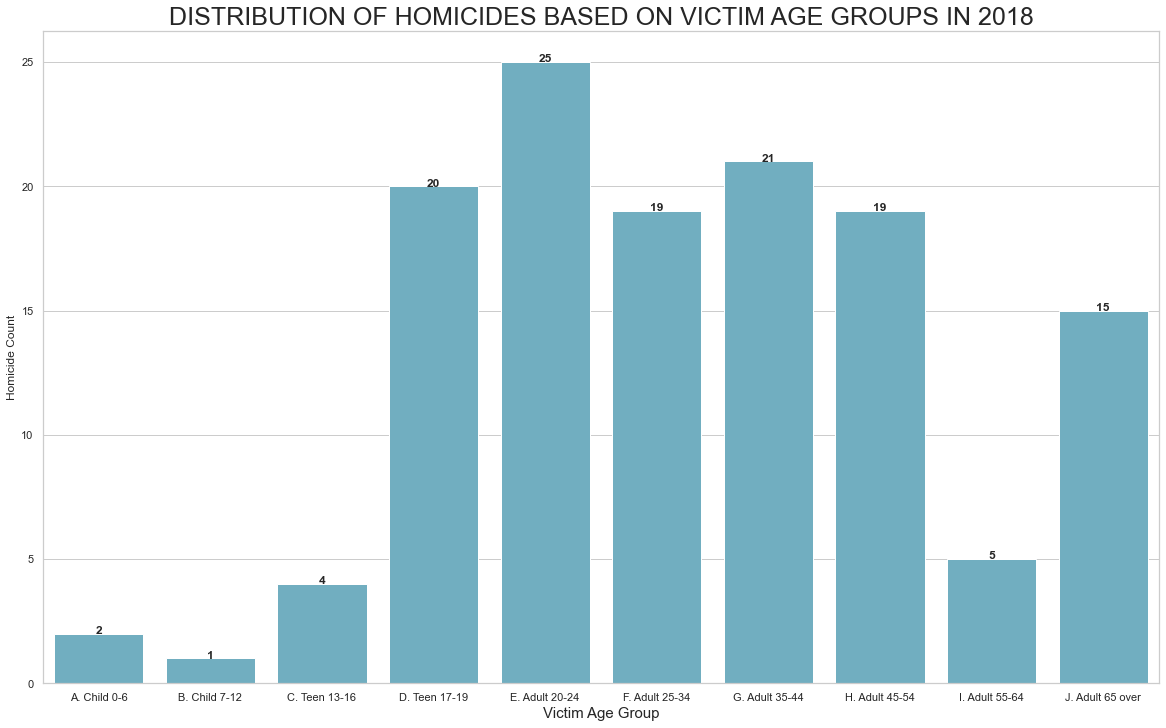

In [17]:
# A distribution of homicides as per the various age groups over the years.
for year in np.arange(2008, 2019):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(20,12))
    ax = sns.countplot(data=df1[df1.year == year].sort_values(by=['vicagegp']), x="vicagegp", color=sns.color_palette()[9])
    ax.set_title('distribution of homicides based on victim age groups in {}'.format(year).upper(), fontsize=25)
    ax.set_xlabel('Victim Age Group', fontsize=15)
    ax.set_ylabel('Homicide Count', fontsize=12)
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width()/2, i.get_height(), i.get_height(), horizontalalignment='center', fontweight='bold')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1328 non-null   datetime64[ns]
 1   vicage     1328 non-null   int64         
 2   vicsex     1328 non-null   object        
 3   vicethnic  1281 non-null   object        
 4   weapon     1328 non-null   object        
 5   Status     1328 non-null   object        
 6   latitude   1328 non-null   float64       
 7   longitude  1328 non-null   float64       
 8   vicagegp   1328 non-null   object        
 9   catdom     1328 non-null   int64         
 10  catsyvage  1328 non-null   int64         
 11  lsoacode   1328 non-null   object        
 12  ladnm      1328 non-null   object        
 13  year       1328 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 109.0+ KB


##### _Exploring Victim Sex_

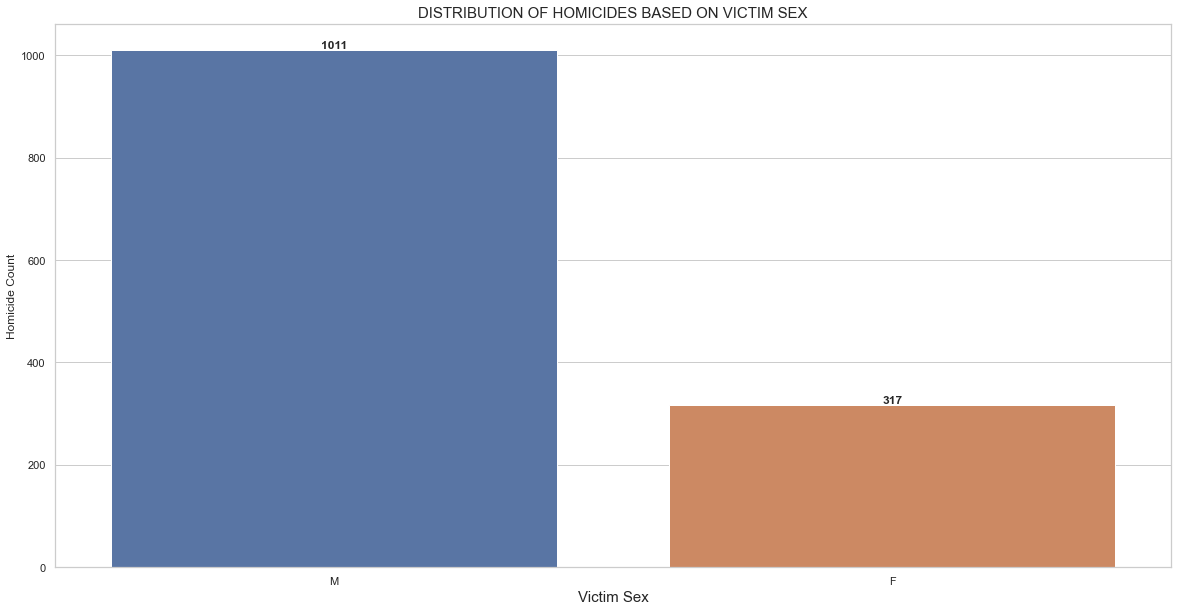

In [19]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data=df1, x="vicsex")
ax.set_title('distribution of homicides based on Victim sex'.upper(), fontsize=15)
ax.set_xlabel('Victim Sex', fontsize=15)
ax.set_ylabel('Homicide Count', fontsize=12)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height()+2, round(i.get_height(), 2), horizontalalignment='center', fontweight='bold')


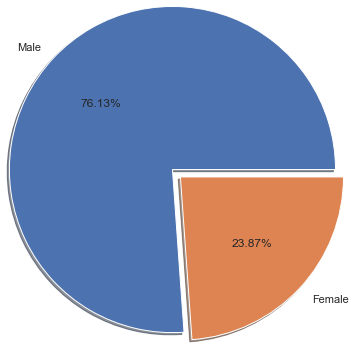

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
ax = plt.pie(df1.vicsex.value_counts(), labels=['Male', 'Female'], explode=[0.1,0], shadow=True, radius=1.5, autopct='%1.2f%%')

From 2008 - 2018 more male of been murdered than females.

During the said period, the number of males murdered was 3 times the number of murdered females. 

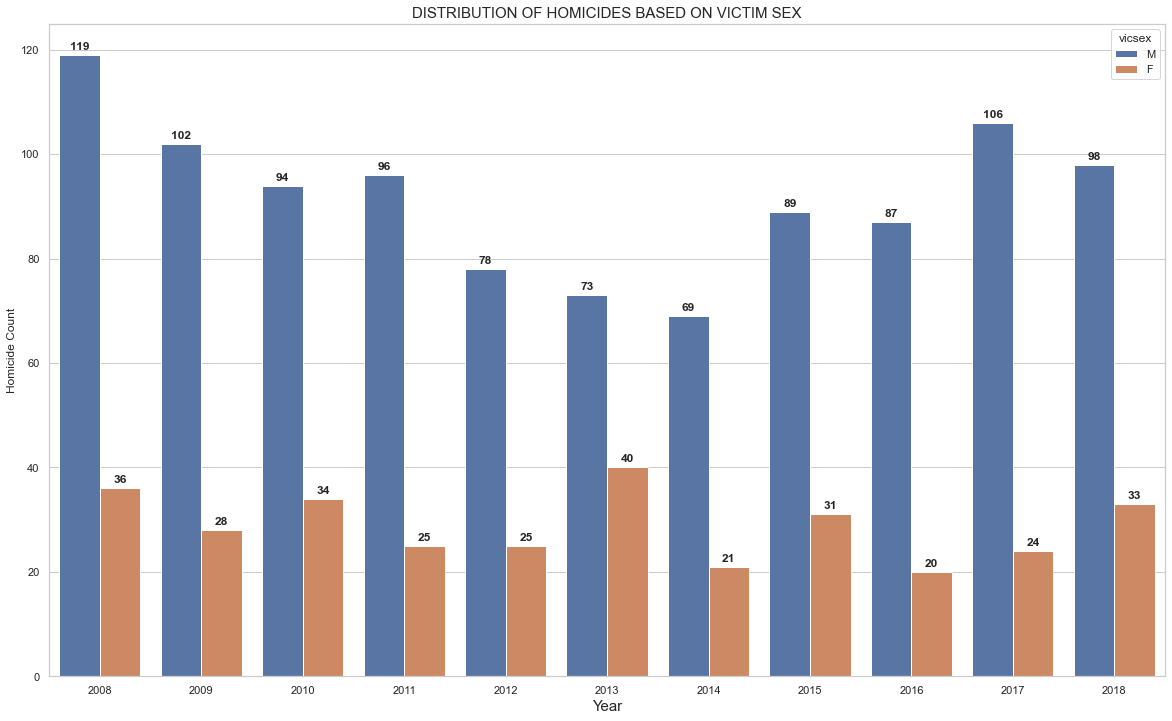

In [21]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.countplot(data=df1, x="year", hue="vicsex")
ax.set_title('distribution of homicides based on victim sex'.upper(), fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Homicide Count', fontsize=12)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height()+1, i.get_height(), horizontalalignment='center', fontweight='bold')

##### _Exploring Ethnicity Of Victim_

In [22]:
# df1.vicethnic.value_counts() 
# df1.vicethnic.isnull().sum()

In [23]:
# Replacing missing values with the mode of the colomn.
df1.vicethnic.fillna('White or White British', inplace=True)

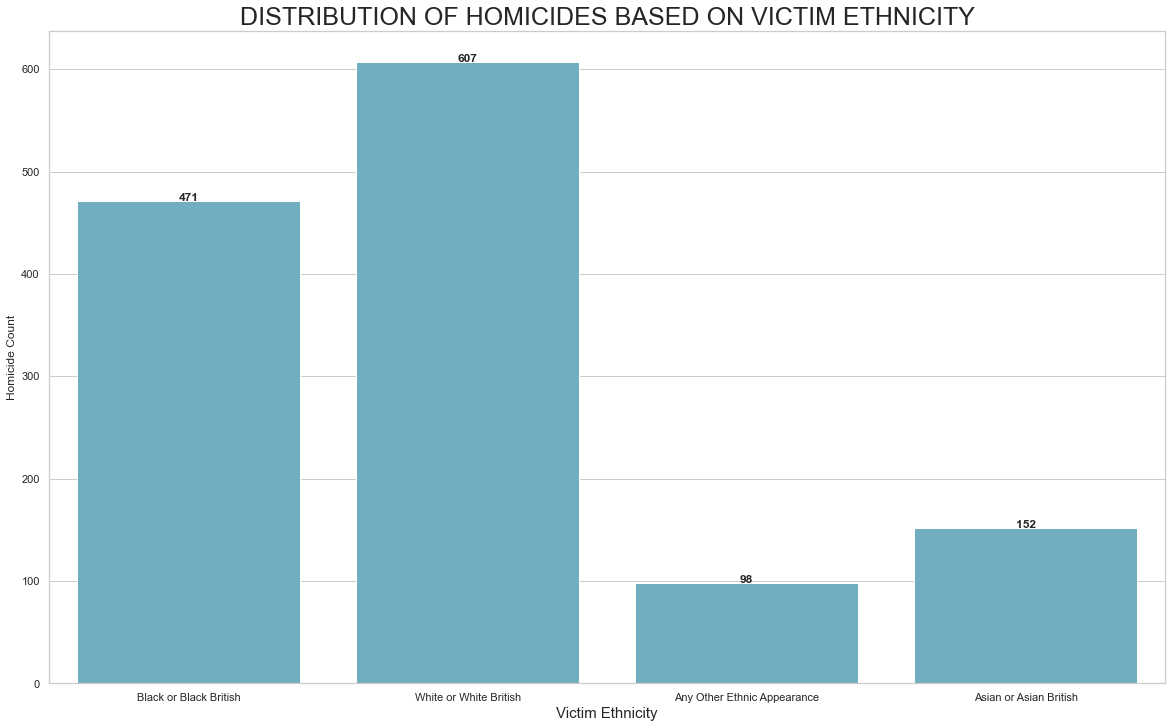

In [24]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.countplot(data=df1, x="vicethnic", color=sns.color_palette()[9])
ax.set_title('distribution of homicides based on victim ethnicity'.upper(), fontsize=25)
ax.set_xlabel('Victim Ethnicity', fontsize=15)
ax.set_ylabel('Homicide Count', fontsize=12)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height(), i.get_height(), horizontalalignment='center', fontweight='bold')

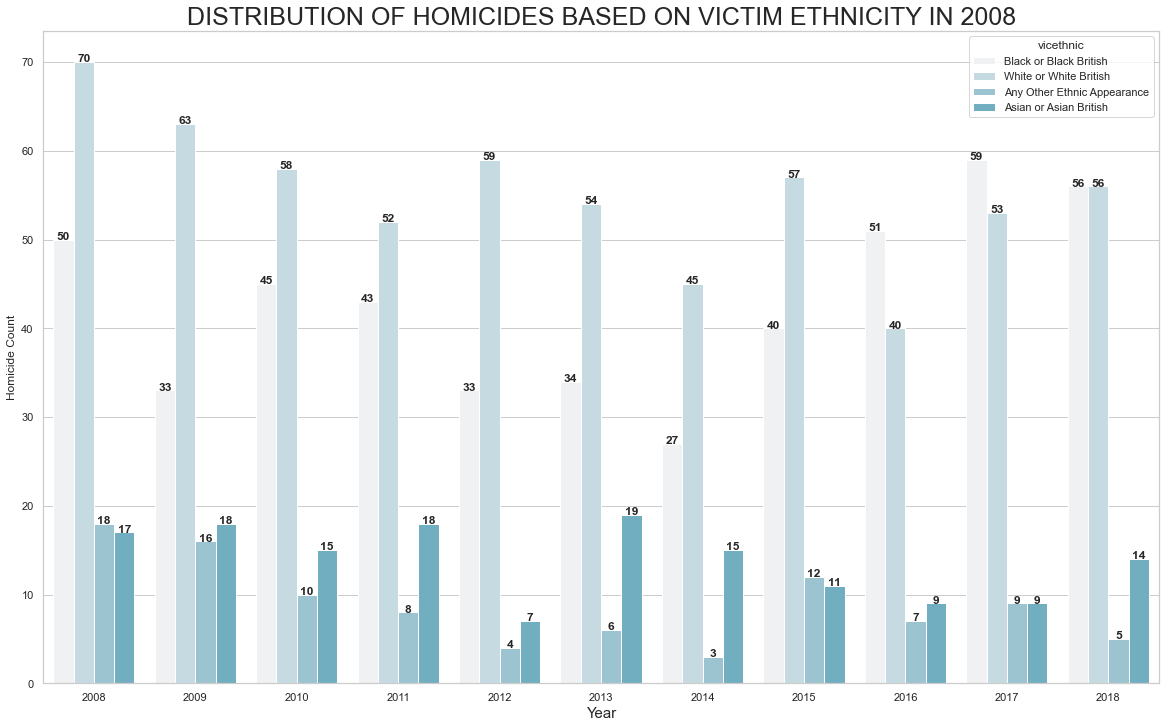

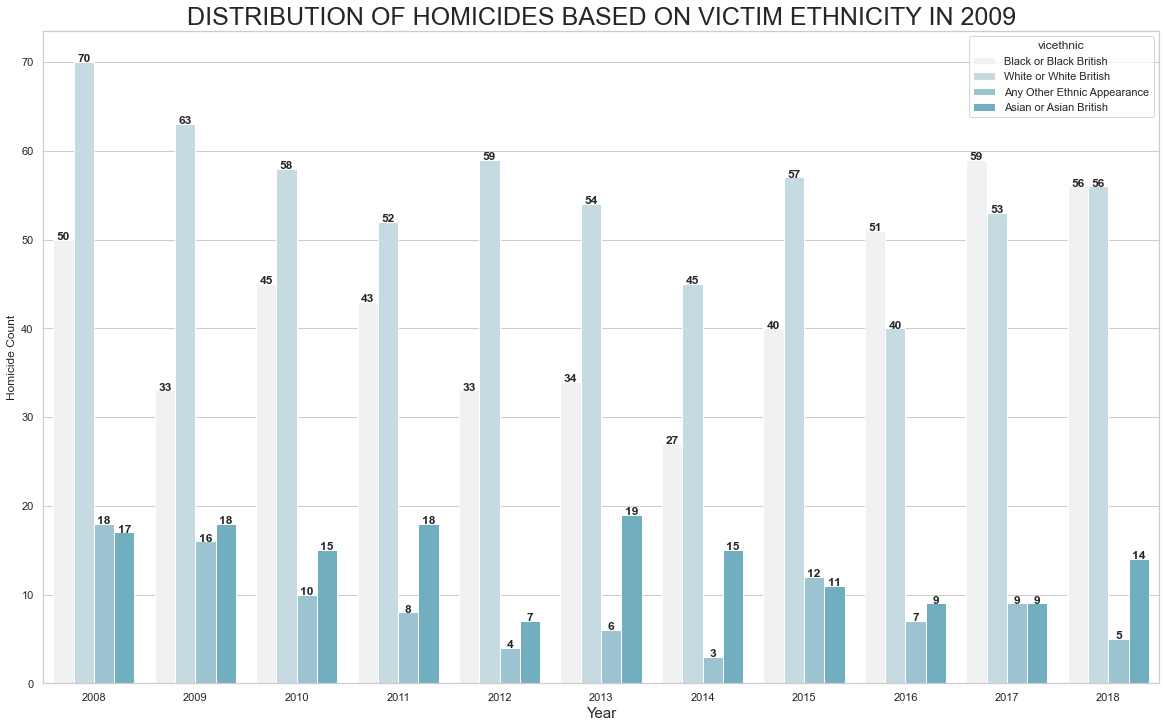

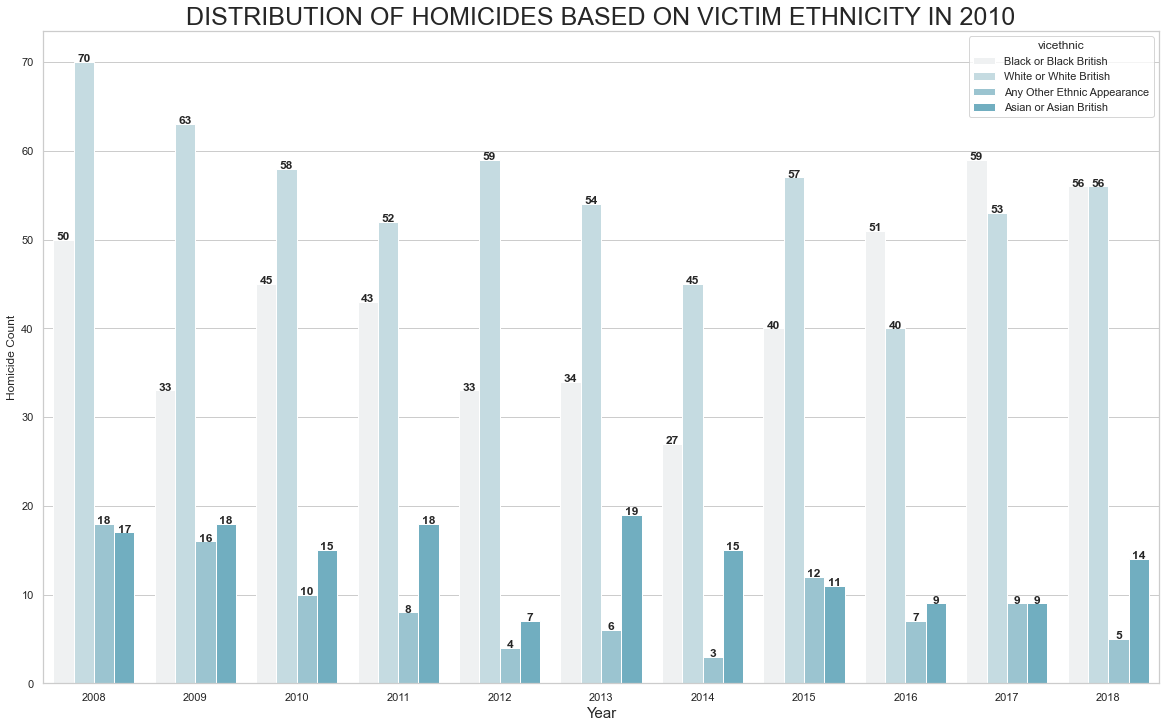

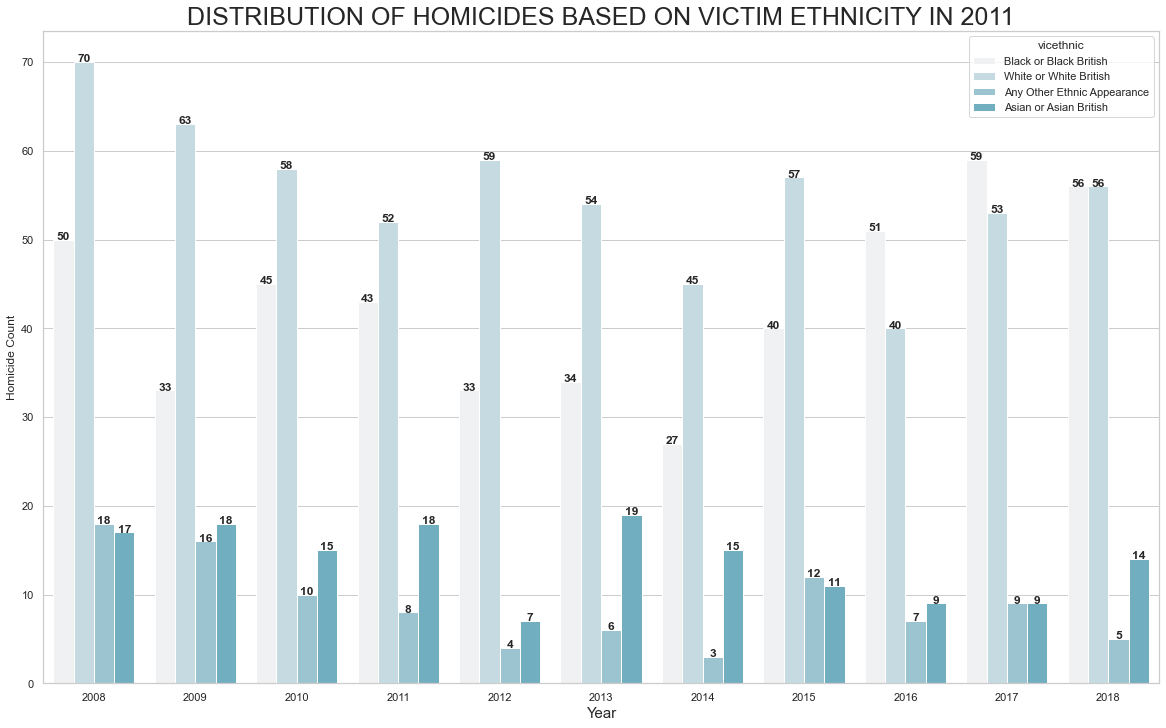

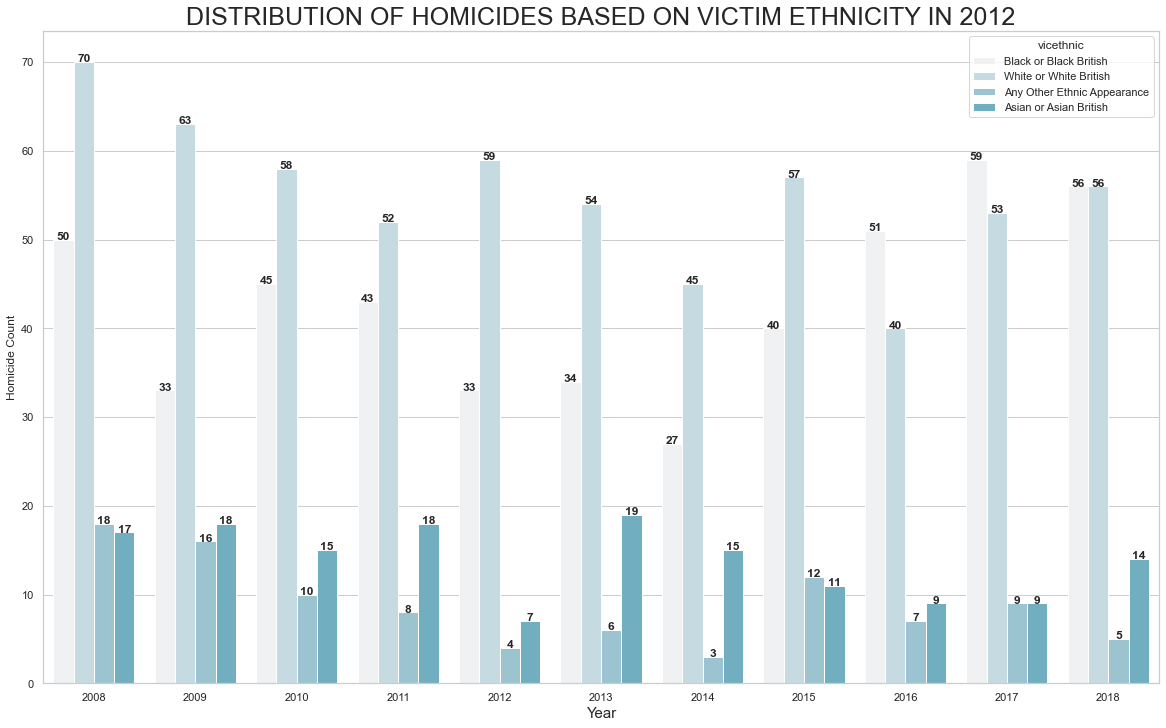

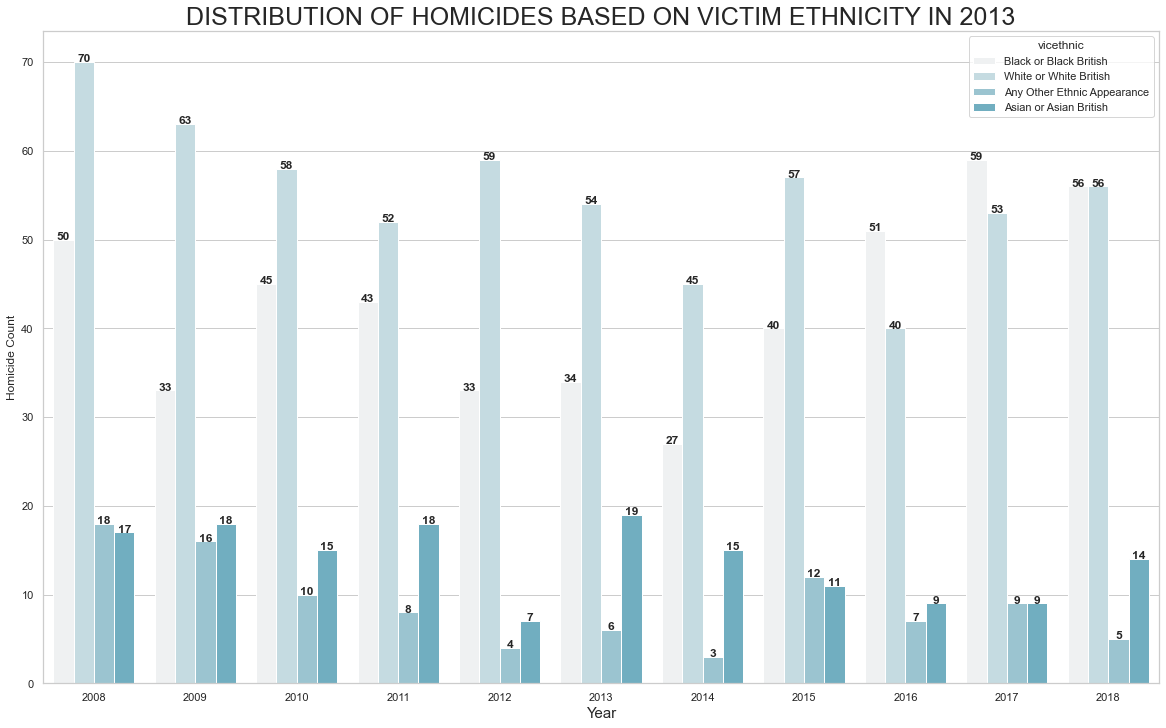

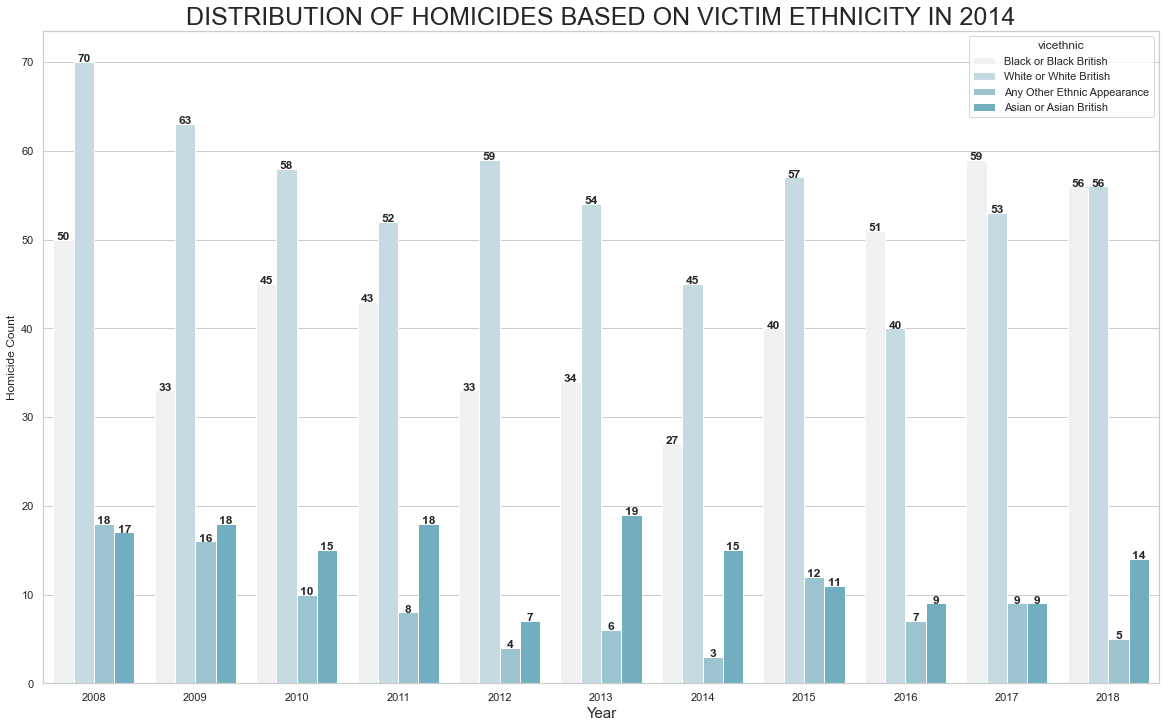

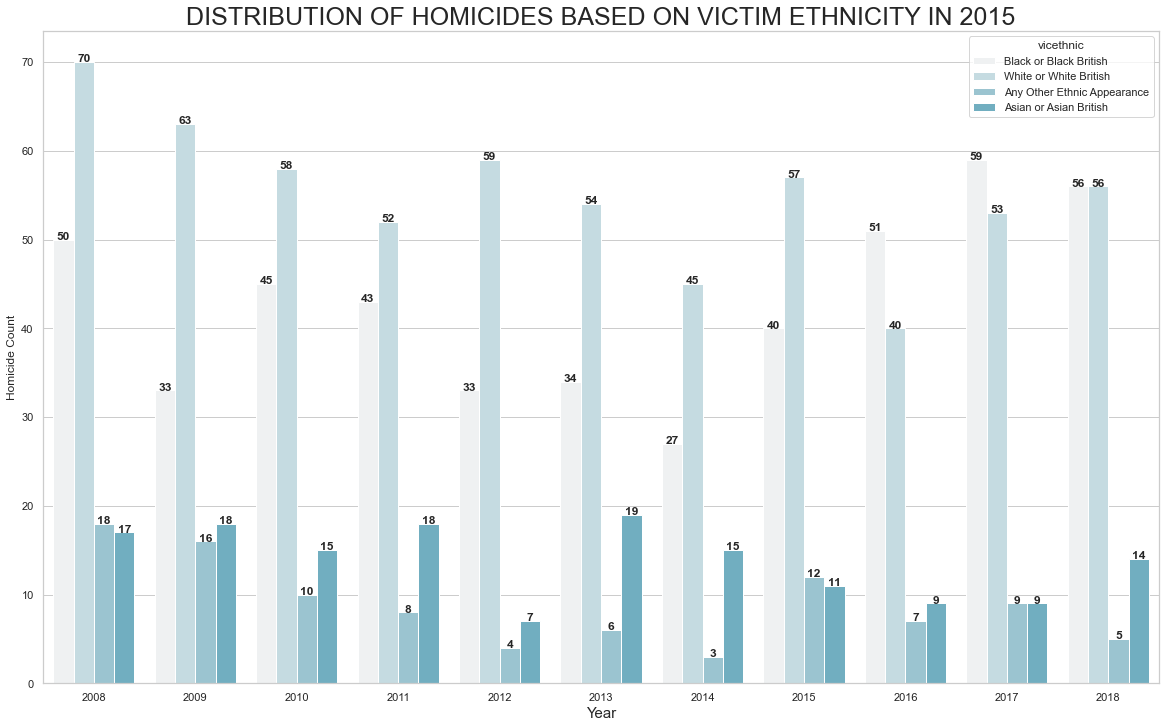

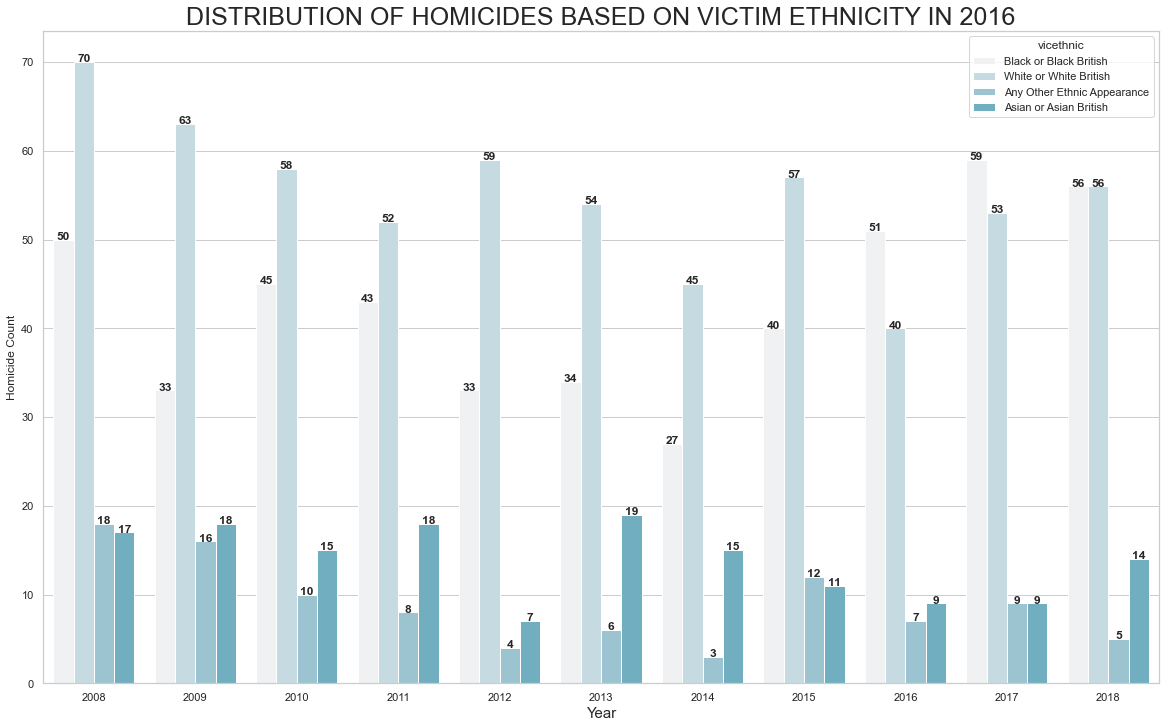

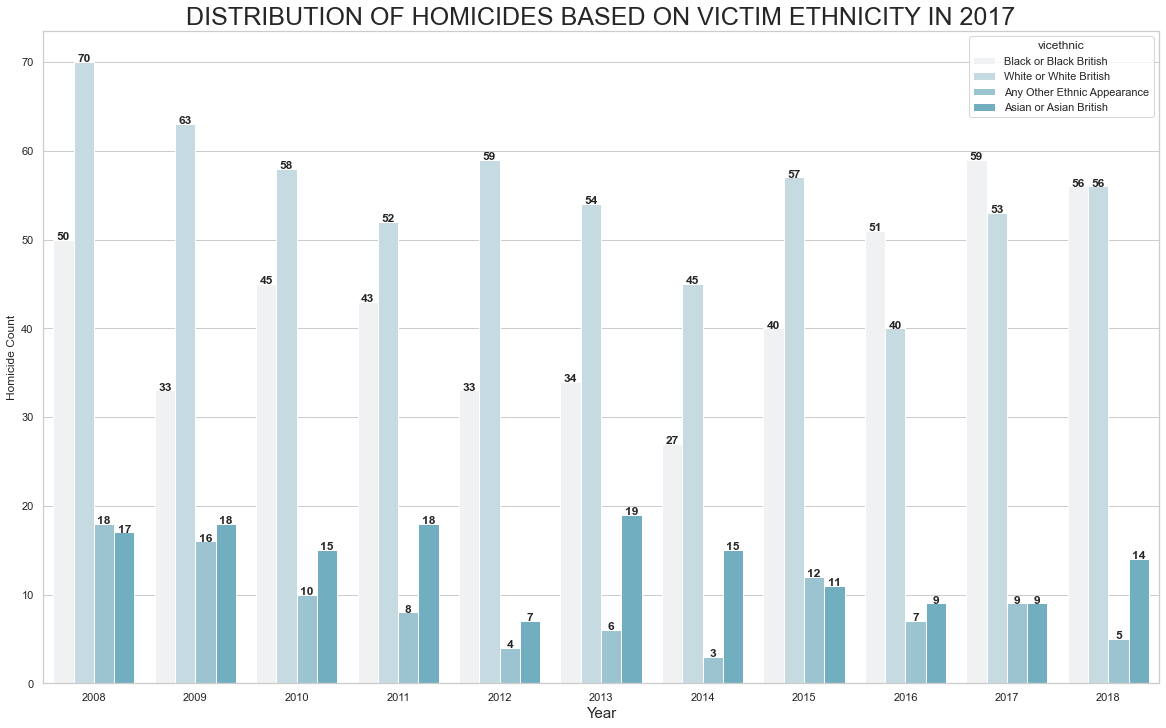

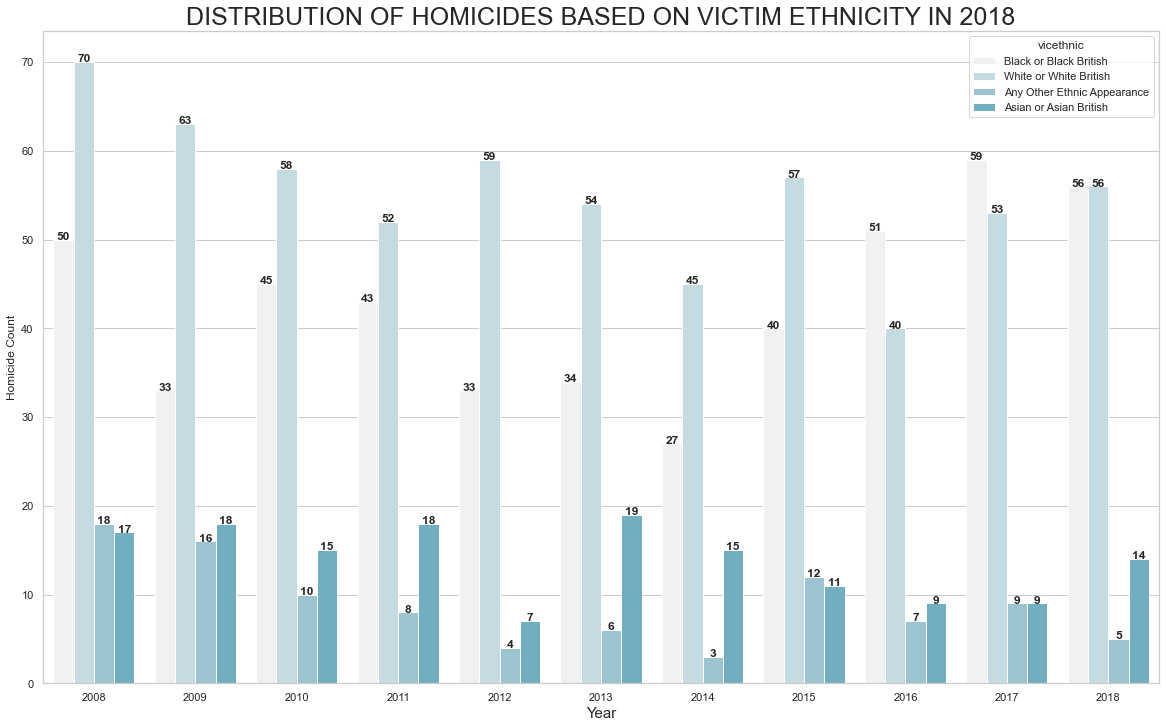

In [25]:
# A distribution of homicides as per the ethnicity of the victim over the years.
for year in np.arange(2008, 2019):
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(figsize=(20,12))
    ax = sns.countplot(data=df1, x="year", hue="vicethnic", color=sns.color_palette()[9])
    ax.set_title('distribution of homicides based on victim ethnicity in {}'.format(year).upper(), fontsize=25)
    ax.set_xlabel('Year', fontsize=15)
    ax.set_ylabel('Homicide Count', fontsize=12)
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width()/2, i.get_height(), i.get_height(), horizontalalignment='center', fontweight='bold')

In [26]:
df1

date  vicage vicsex                    vicethnic        weapon  \
0    2008-01-03      18      M       Black or Black British         Knife   
1    2008-01-06      44      F       White or White British         Knife   
2    2008-01-07      18      M  Any Other Ethnic Appearance         Knife   
3    2008-01-08      58      M       White or White British  Blunt Object   
4    2008-01-13      25      M  Any Other Ethnic Appearance         Knife   
...         ...     ...    ...                          ...           ...   
1323 2018-04-15      18      F       White or White British          None   
1324 2018-07-07      57      M       White or White British          None   
1325 2018-08-17      52      M       White or White British        Poison   
1326 2018-12-18      20      M       Black or Black British           Gun   
1327 2018-12-22      25      M       Black or Black British         Knife   

                Status   latitude  longitude        vicagegp  catdom  \
0               Solved  51.616240  -0.063950   D. Teen 17-19       0   
1               Solved  51.459990  -0.132450  G. Adult 35-44       1   
2               Solved  51.474090   0.178960   D. Teen 17-19       0   
3               Solved  51.586850  -0.276050  I. Adult 55-64       0   
4               Solved  51.462220  -0.114010  F. Adult 25-34       0   
...                ...        ...        ...             ...     ...   
1323  Awaiting Outcome  51.499608   0.118693   D. Teen 17-19       1   
1324  Awaiting Outcome  51.556879   0.006391  I. Adult 55-64       0   
1325  Awaiting Outcome  51.361473  -0.306080  H. Adult 45-54       0   
1326  Awaiting Outcome  51.632943  -0.050988  E. Adult 20-24       0   
1327  Awaiting Outcome  51.592631  -0.069436  F. Adult 25-34       0   

      catsyvage   lsoacode                 ladnm  year  
0             1  E01001432               Enfield  2008  
1             0  E01003057               Lambeth  2008  
2             1  E01000373                Bexley  2008  
3             0  E01000591                 Brent  2008  
4             0  E01003047               Lambeth  2008  
...         ...        ...                   ...   ...  
1323          0  E01001575             Greenwich  2018  
1324          0  E01004328        Waltham Forest  2018  
1325          0  E01002947  Kingston upon Thames  2018  
1326          1  E01001482               Enfield  2018  
1327          1  E01002081              Haringey  2018  

[1328 rows x 14 columns]

##### _Exploring The Weapons Used_

In [27]:
df1.weapon.value_counts()

Knife            659
None             323
Gun              140
Other             87
Blunt Object      53
Vehicle           21
Poison            18
Ligature          15
Arson             10
Strangulation      2
Name: weapon, dtype: int64

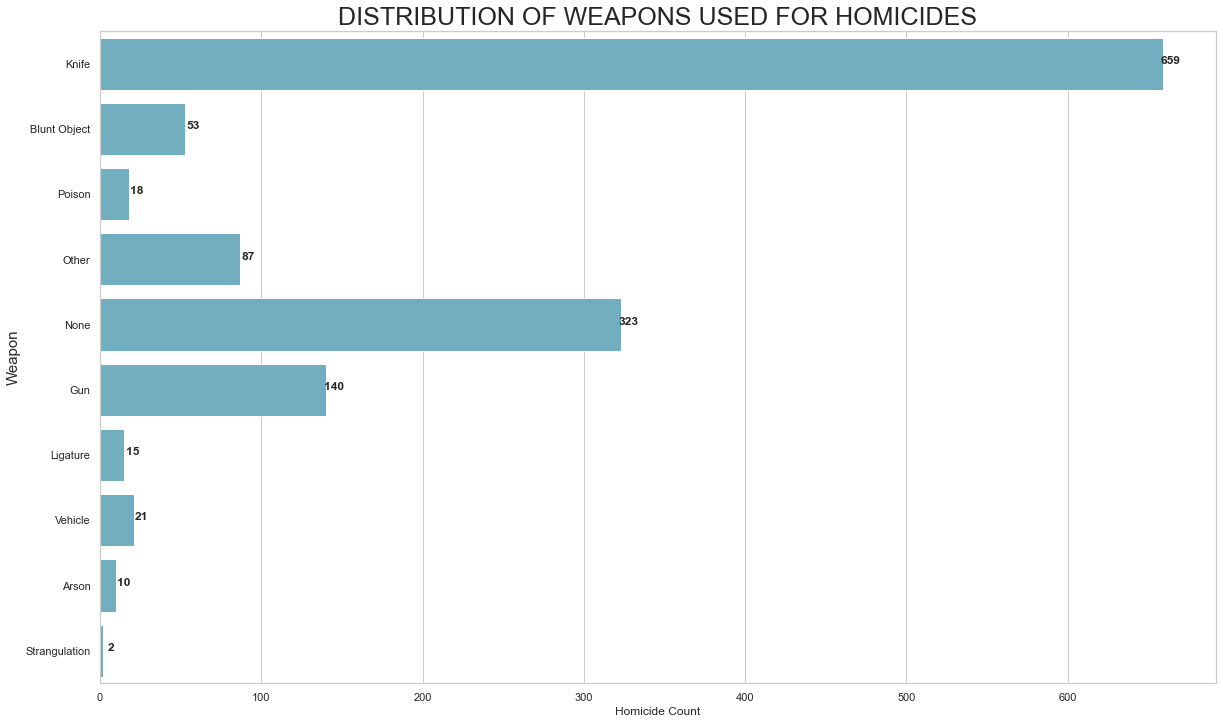

In [28]:
fig, ax = plt.subplots(figsize=(20,12))
ax = sns.countplot(data=df1, y="weapon", color=sns.color_palette()[9])
ax.set_title('distribution of weapons used for homicides'.upper(), fontsize=25)
ax.set_ylabel('Weapon', fontsize=15)
ax.set_xlabel('Homicide Count', fontsize=12)
for i in ax.patches:
    ax.text(i.get_width()+5, i.get_y() + i.get_height()/2, i.get_width(), horizontalalignment='center', fontweight='bold')

From the above plot we can see that, most homicides were committed using knives.

In [29]:
# df1.ladnm.value_counts()

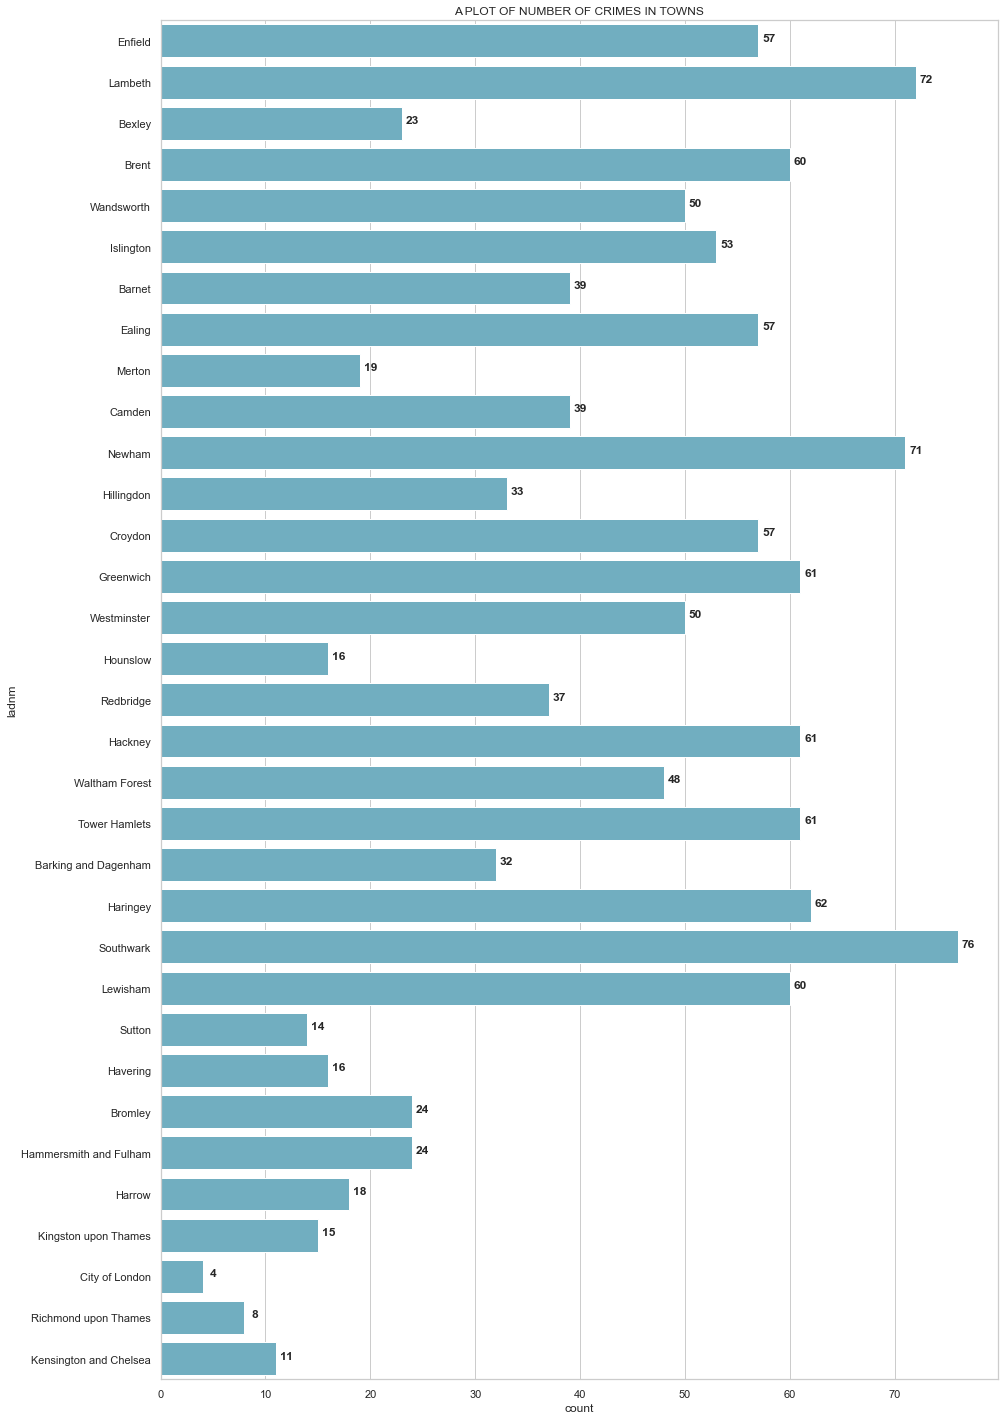

In [30]:
# The number of homicides recorded in the various towns.
fig, ax = plt.subplots(figsize=(15,25))
sns.set_style('darkgrid')
ax = sns.countplot(data=df1, y='ladnm', color=sns.color_palette()[9])
ax.set_title("A PLOT OF NUMBER OF CRIMES IN TOWNS")
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y() + i.get_height()/2, i.get_width(), horizontalalignment='center', fontweight='bold')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Enfield'),
  Text(1, 0, 'Lambeth'),
  Text(2, 0, 'Bexley'),
  Text(3, 0, 'Brent'),
  Text(4, 0, 'Wandsworth'),
  Text(5, 0, 'Islington'),
  Text(6, 0, 'Barnet'),
  Text(7, 0, 'Ealing'),
  Text(8, 0, 'Merton'),
  Text(9, 0, 'Camden'),
  Text(10, 0, 'Newham'),
  Text(11, 0, 'Hillingdon'),
  Text(12, 0, 'Croydon'),
  Text(13, 0, 'Greenwich'),
  Text(14, 0, 'Westminster'),
  Text(15, 0, 'Hounslow'),
  Text(16, 0, 'Redbridge'),
  Text(17, 0, 'Hackney'),
  Text(18, 0, 'Waltham Forest'),
  Text(19, 0, 'Tower Hamlets'),
  Text(20, 0, 'Barking and Dagenham'),
  Text(21, 0, 'Haringey'),
  Text(22, 0, 'Southwark'),
  Text(23, 0, 'Lewisham'),
  Text(24, 0, 'Sutton'),
  Text(25, 0, 'Havering'),
  Text(26, 0, 'Bromley'),
  Text(27, 0, 'Hammersmith and Fulham'),
  Text(28, 0, 'Harrow'),
  Text(29, 0, 'Kingston upon Thames'),
  Text(30, 0, 

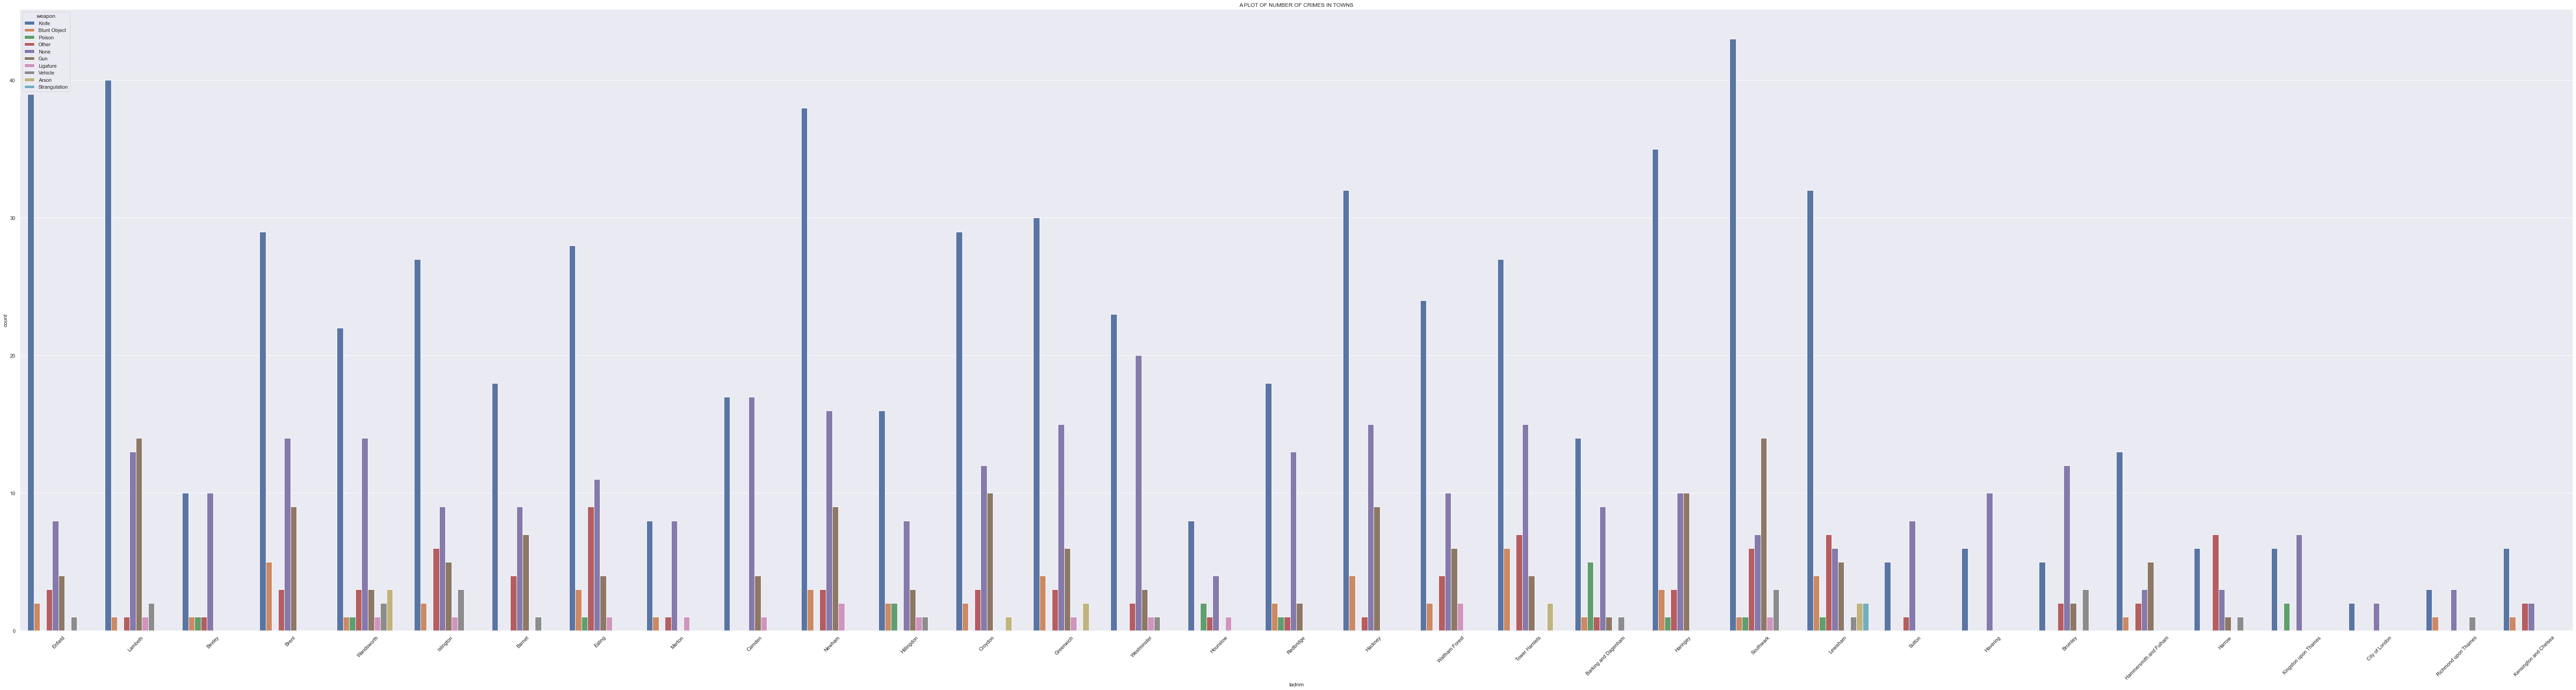

In [31]:
# The distribution of weapons used for homicides in the various towns. 
fig, ax = plt.subplots(figsize=(100,25))
sns.set_style('darkgrid')
ax = sns.countplot(data=df1, x='ladnm', hue='weapon')
ax.set_title("A PLOT OF NUMBER OF CRIMES IN TOWNS")
plt.xticks(rotation=45)
# for i in ax.patches:
#     ax.text(i.get_width()+1, i.get_y() + i.get_height()/2, i.get_width(), horizontalalignment='center', fontweight='bold')

# df1.groupby(['ladnm']).weapon.value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Enfield'),
  Text(1, 0, 'Lambeth'),
  Text(2, 0, 'Bexley'),
  Text(3, 0, 'Brent'),
  Text(4, 0, 'Wandsworth'),
  Text(5, 0, 'Islington'),
  Text(6, 0, 'Barnet'),
  Text(7, 0, 'Ealing'),
  Text(8, 0, 'Merton'),
  Text(9, 0, 'Camden'),
  Text(10, 0, 'Newham'),
  Text(11, 0, 'Hillingdon'),
  Text(12, 0, 'Croydon'),
  Text(13, 0, 'Greenwich'),
  Text(14, 0, 'Westminster'),
  Text(15, 0, 'Hounslow'),
  Text(16, 0, 'Redbridge'),
  Text(17, 0, 'Hackney'),
  Text(18, 0, 'Waltham Forest'),
  Text(19, 0, 'Tower Hamlets'),
  Text(20, 0, 'Barking and Dagenham'),
  Text(21, 0, 'Haringey'),
  Text(22, 0, 'Southwark'),
  Text(23, 0, 'Lewisham'),
  Text(24, 0, 'Sutton'),
  Text(25, 0, 'Havering'),
  Text(26, 0, 'Bromley'),
  Text(27, 0, 'Hammersmith and Fulham'),
  Text(28, 0, 'Harrow'),
  Text(29, 0, 'Kingston upon Thames'),
  Text(30, 0, 

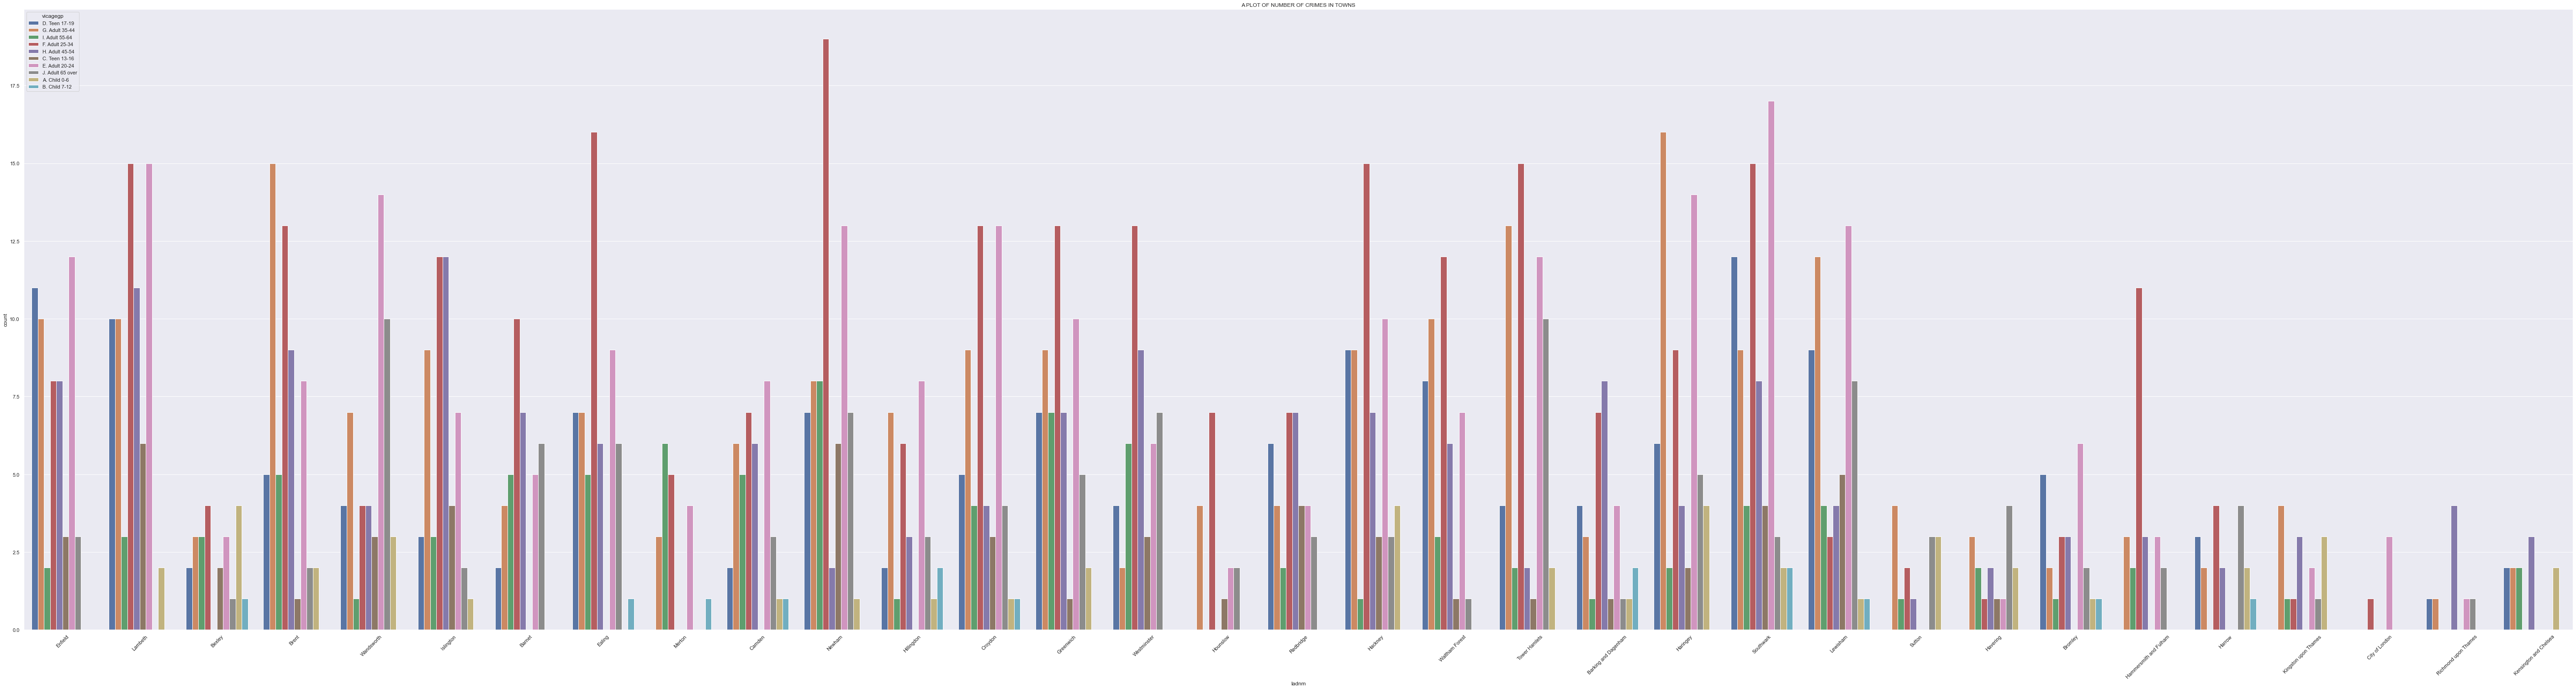

In [32]:
# The distribution of weapons used for homicides in the various towns. 
fig, ax = plt.subplots(figsize=(100,25))
sns.set_style('darkgrid')
ax = sns.countplot(data=df1, x='ladnm', hue='vicagegp')
ax.set_title("A PLOT OF NUMBER OF CRIMES IN TOWNS")
plt.xticks(rotation=45)

# df1.groupby(['ladnm']).vicagegp.value_counts()

In [33]:
# Making a map of London
m = folium.Map(location=[51.507351, -0.127758], tiles="cartodbpositron")

# Making a marker cluster to contain all of the points (latitudes and longitudes) in the dataset.
points = MarkerCluster().add_to(m)

# Extracting points from the dataset and adding them to the cluster object.
for i,f in df1.iterrows():
    folium.Marker([f.latitude, f.longitude]).add_to(points)
    
m

In [34]:
n = folium.Map(location=[51.507351, -0.127758], tiles="cartodbdark_matter")

# Making a heatmap to show all homicide hotspots.
heat = HeatMap(df1[['latitude', 'longitude']], min_opacity=0.3).add_to(n)

n